<a href="https://colab.research.google.com/github/santyxd3000/Undergraduate-Project/blob/main/UndergraduateProjectScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DE GRADO**
Santiago Pardo Morales - 202013025

In [3]:
#For using the GPU
#!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
#!python rapidsai-csp-utils/colab/pip-install.py

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import datetime
import scipy
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import io
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
#import cudf
#import cuml
#import cupy as cp
#from cuml import preprocessing as cpp
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
physical_devices = tf.config.list_physical_devices('GPU')
from sklearn.covariance import MinCovDet
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2

In [5]:
print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [6]:
#Visual Studio / GitHub
'''
filtered_data = pd.read_csv('filtered_data.csv',sep=';').dropna()
normal_operation_data = pd.read_csv('normal_operation_data.csv',sep=';').dropna()
anomaly_data = pd.read_csv('anomaly_data.csv',sep=';').dropna()
'''

"\nfiltered_data = pd.read_csv('filtered_data.csv',sep=';').dropna()\nnormal_operation_data = pd.read_csv('normal_operation_data.csv',sep=';').dropna()\nanomaly_data = pd.read_csv('anomaly_data.csv',sep=';').dropna()\n"

In [7]:
#Google Colab

#from google.colab import files
#uploaded = files.upload()


In [8]:
#Google Colab

filtered_data = pd.read_csv('filtered_data.csv',sep=';').dropna()
normal_operation_data = pd.read_csv('normal_operation_data.csv',sep=';').dropna()
anomaly_data = pd.read_csv('anomaly_data.csv',sep=';').dropna()


**ANÁLISIS DE LOS DATOS**

*Datos conjuntos*

Text(0, 0.5, 'Frequency')

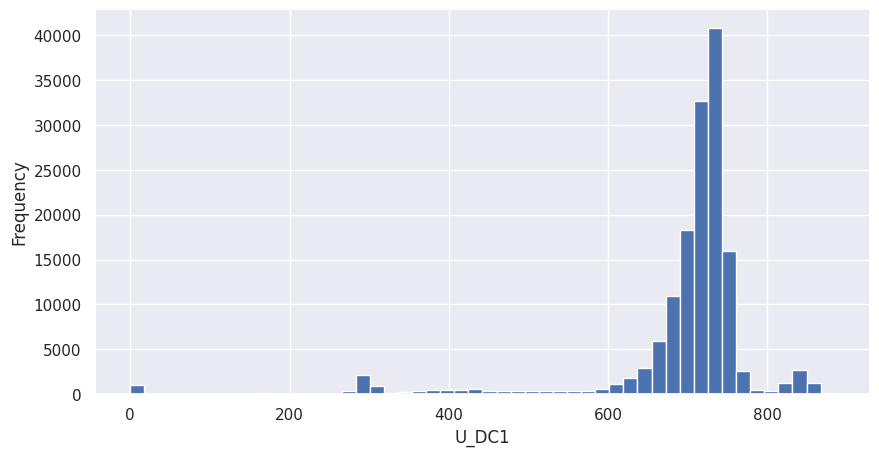

In [9]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["U_DC1"],bins=50)
plt.xlabel('U_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

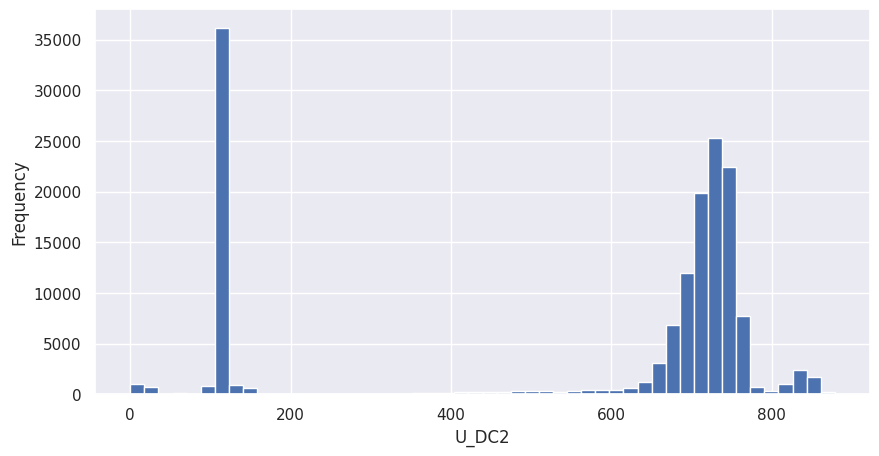

In [10]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["U_DC2"],bins=50)
plt.xlabel('U_DC2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

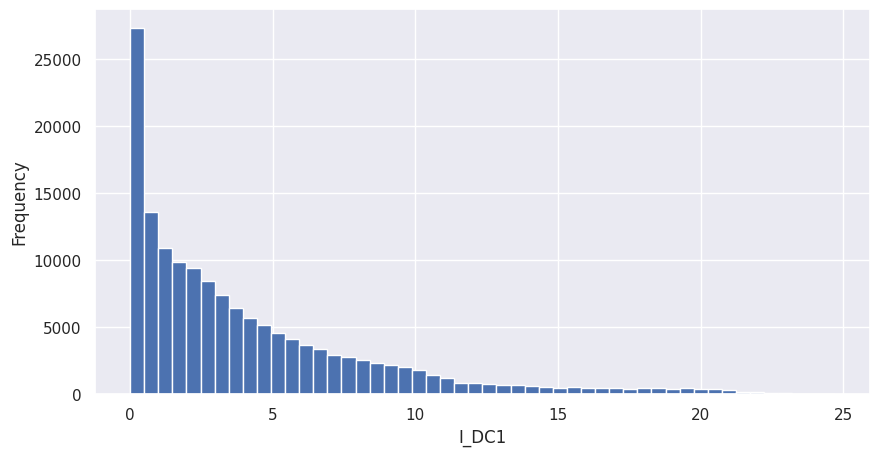

In [11]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["I_DC1"],bins=50)
plt.xlabel('I_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

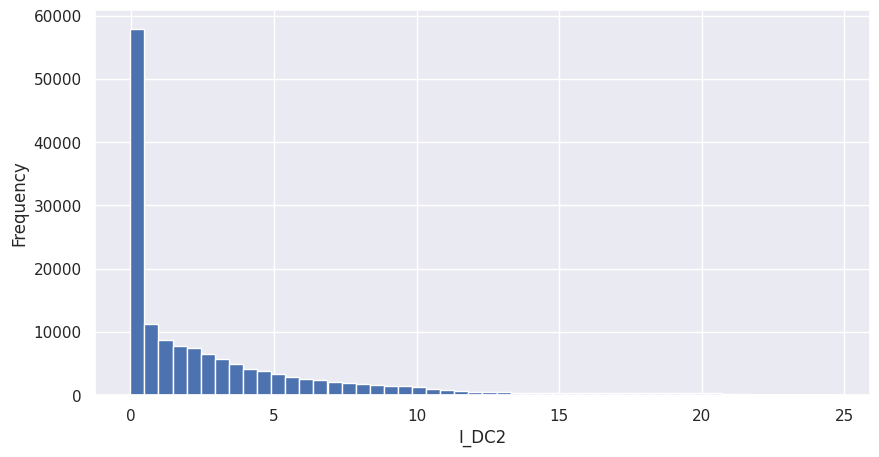

In [12]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["I_DC2"],bins=50)
plt.xlabel('I_DC2')
plt.ylabel('Frequency')

*Datos de "entrenamiento"*

Text(0, 0.5, 'Frequency')

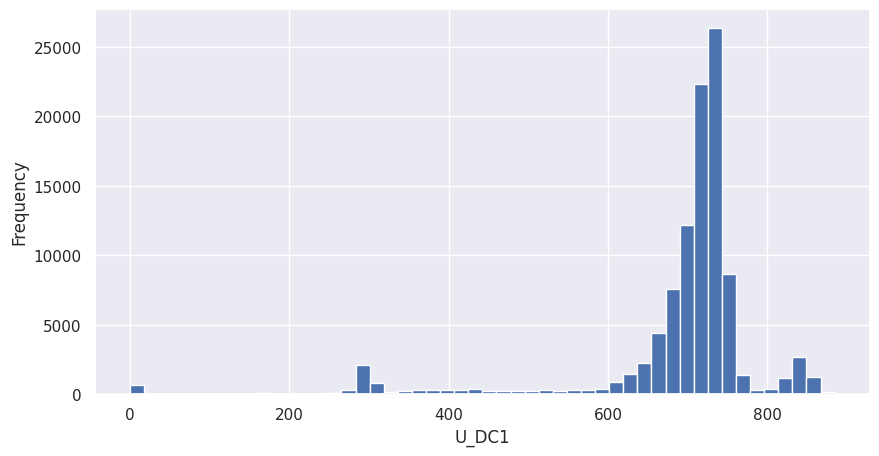

In [13]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["U_DC1"],bins=50)
plt.xlabel('U_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

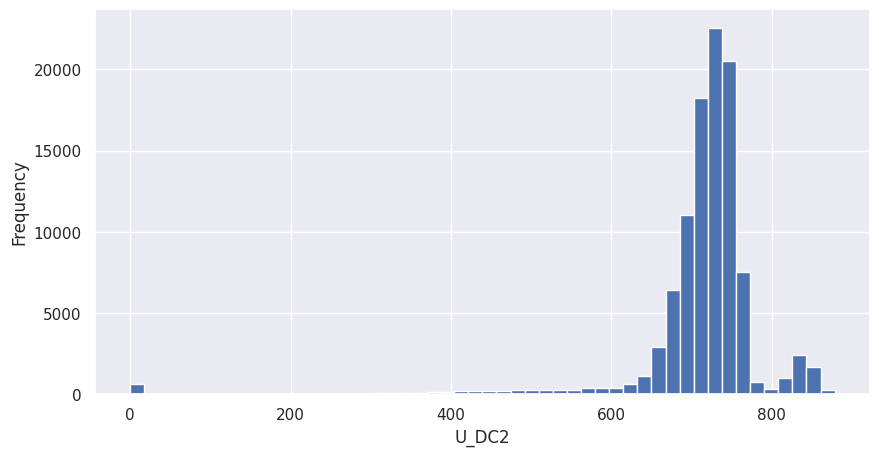

In [14]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["U_DC2"],bins=50)
plt.xlabel('U_DC2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

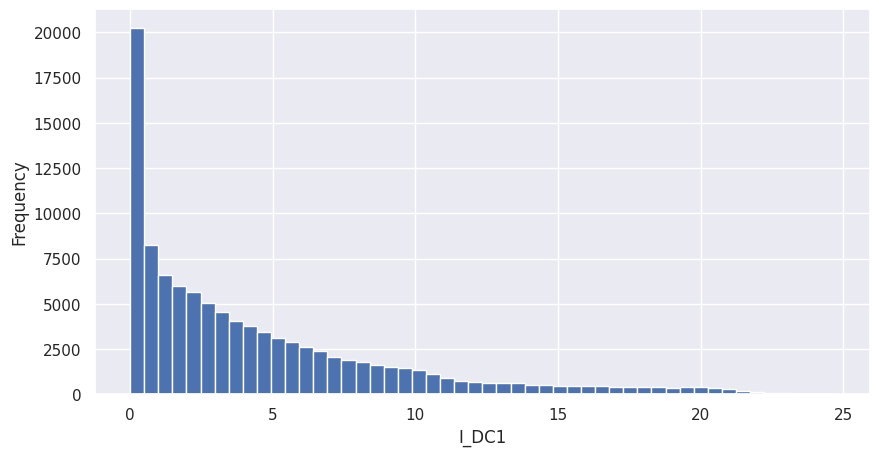

In [15]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["I_DC1"],bins=50)
plt.xlabel('I_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

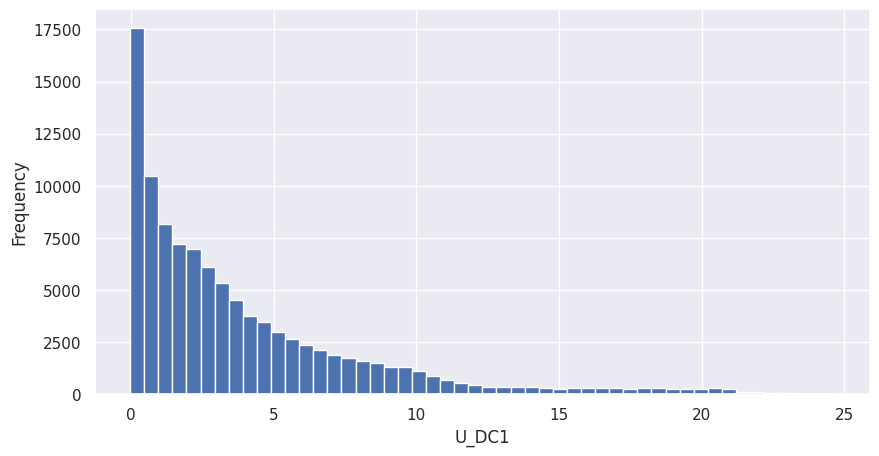

In [16]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["I_DC2"],bins=50)
plt.xlabel('U_DC1')
plt.ylabel('Frequency')

## **MÉTODO ESTADÍSTICO -  RANGO INTERCUARTIL**

### *Datos de entrenamiento*

In [17]:
statistical_df_train = normal_operation_data
statistical_df_test = anomaly_data
statistical_df_train.Timestamp = pd.to_datetime(statistical_df_train.Timestamp, format='%Y-%m-%d %H:%M:%S')
statistical_df_train["Time"] = statistical_df_train.Timestamp.dt.time
statistical_df_test.Timestamp = pd.to_datetime(statistical_df_test.Timestamp, format='%Y-%m-%d %H:%M:%S')
statistical_df_test["Time"] = statistical_df_test.Timestamp.dt.time

Text(0, 0.5, 'Current of the system')

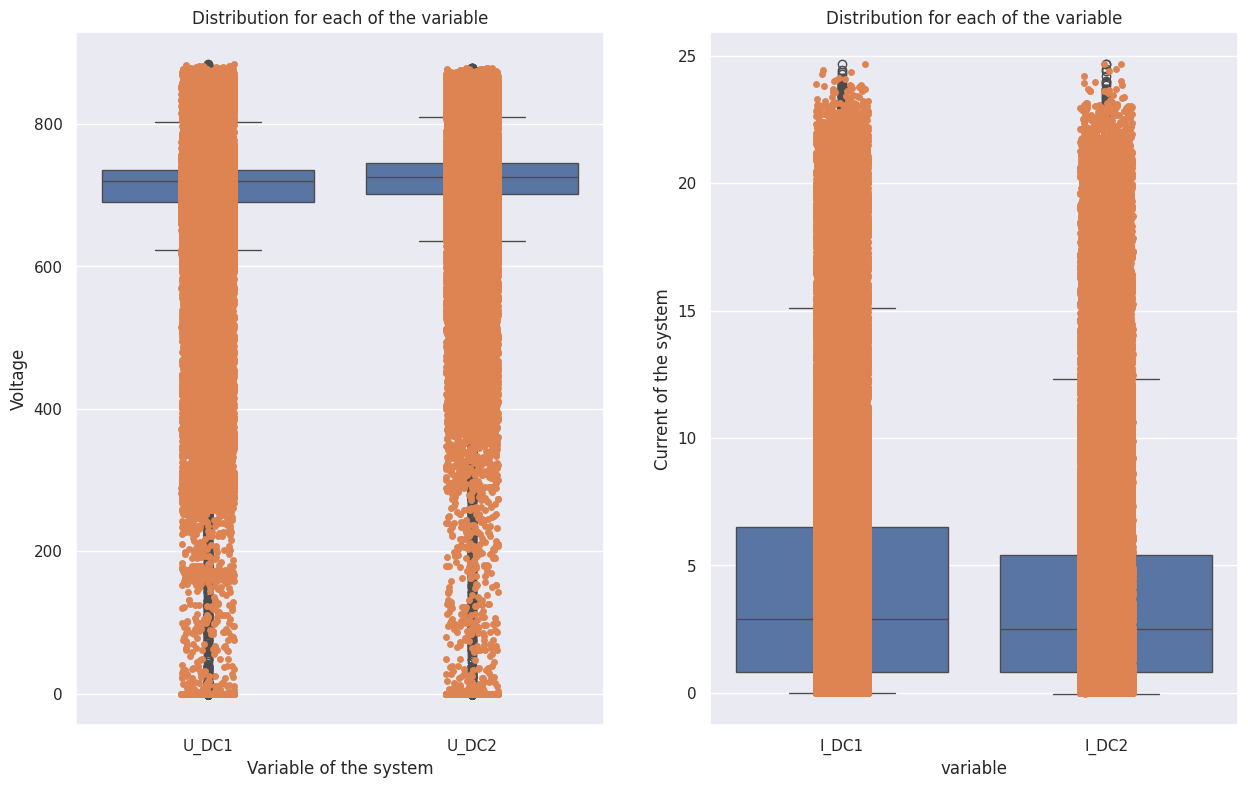

In [18]:
a = statistical_df_train[["U_DC1","U_DC2"]].melt()
b = statistical_df_train[["I_DC1","I_DC2"]].melt()
fig, axes = plt.subplots(1,2,figsize=(15,9))
sns.boxplot(x="variable",y="value",data=a,ax=axes[0])
sns.stripplot(data = a, x= "variable",y="value",ax=axes[0])
axes[0].set_title("Distribution for each of the variable")
axes[0].set_xlabel("Variable of the system")
axes[0].set_ylabel("Voltage")

sns.boxplot(x="variable",y="value",data=b,ax=axes[1])
sns.stripplot(data = b, x= "variable",y="value",ax=axes[1])
plt.title("Distribution for each of the variable")
plt.ylabel("Current of the system")

In [19]:
q1_group = statistical_df_train.groupby('Time')[['U_DC1','U_DC2','I_DC1','I_DC2']].agg(lambda x: x.quantile(0.25)).reset_index()
q3_group = statistical_df_train.groupby('Time')[['U_DC1','U_DC2','I_DC1','I_DC2']].agg(lambda x: x.quantile(0.75)).reset_index()

In [20]:
time = np.array(q1_group['Time'])

In [21]:
q1_group1 = q1_group[['U_DC1','U_DC2','I_DC1','I_DC2']]
q3_group1 = q3_group[['U_DC1','U_DC2','I_DC1','I_DC2']]

iqr_group1 = q3_group1-q1_group1
iqr_group = iqr_group1
iqr_group['Time'] = time
iqr_group1 = iqr_group1.drop('Time',axis=1)

In [22]:
lower_iqr = q1_group1 - 3*iqr_group1
upper_iqr = q3_group1 + 3*iqr_group1

In [23]:
iqr_values = pd.DataFrame()
iqr_values['Upper_UDC1'] = upper_iqr[['U_DC1']]
iqr_values['Upper_UDC2'] = upper_iqr[['U_DC2']]
iqr_values['Upper_IDC1'] = upper_iqr[['I_DC1']]
iqr_values['Upper_IDC2'] = upper_iqr[['I_DC2']]
iqr_values['Lower_UDC1'] = lower_iqr[['U_DC1']]
iqr_values['Lower_UDC2'] = lower_iqr[['U_DC2']]
iqr_values['Lower_IDC1'] = lower_iqr[['I_DC1']]
iqr_values['Lower_IDC2'] = lower_iqr[['I_DC2']]
iqr_values['Time'] = time

In [24]:
merged_df_train = pd.merge(statistical_df_train, iqr_values, how="inner", on=["Time"])

In [25]:
merged_df_train['Anomaly_UDC1'] = np.where((merged_df_train['U_DC1'] < merged_df_train['Lower_UDC1']) | (merged_df_train['U_DC1'] > merged_df_train['Upper_UDC1']), 1,0)
merged_df_train['Anomaly_UDC2'] = np.where((merged_df_train['U_DC2'] < merged_df_train['Lower_UDC2']) | (merged_df_train['U_DC2'] > merged_df_train['Upper_UDC2']), 1,0)
merged_df_train['Anomaly_IDC1'] = np.where((merged_df_train['I_DC1'] < merged_df_train['Lower_IDC1']) | (merged_df_train['I_DC1'] > merged_df_train['Upper_IDC1']), 1,0)
merged_df_train['Anomaly_IDC2'] = np.where((merged_df_train['I_DC2'] < merged_df_train['Lower_IDC2']) | (merged_df_train['I_DC2'] > merged_df_train['Upper_IDC2']), 1,0)
merged_df_train['Anomaly_String1'] = np.where((merged_df_train['Anomaly_UDC1'] == 1) | (merged_df_train['Anomaly_IDC1'] == 1), 1,0)
merged_df_train['Anomaly_String2'] = np.where((merged_df_train['Anomaly_UDC2'] == 1) | (merged_df_train['Anomaly_IDC2'] == 1), 1,0)
merged_df_train.loc[:,'Anomaly'] = np.where(
    (merged_df_train['Anomaly_String1'] == 1) |
    (merged_df_train['Anomaly_String2'] == 1),
    1,
    0
)
merged_df_train = merged_df_train.sort_values(by=['Timestamp'])

In [26]:
count0 = (merged_df_train['Anomaly'] == 0).sum()
count1 = (merged_df_train['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

93306 8930


In [27]:
anomaly_iqr_train = merged_df_train[merged_df_train['Anomaly'] == 1]
no_anomaly_iqr_train = merged_df_train[merged_df_train['Anomaly'] == 0]

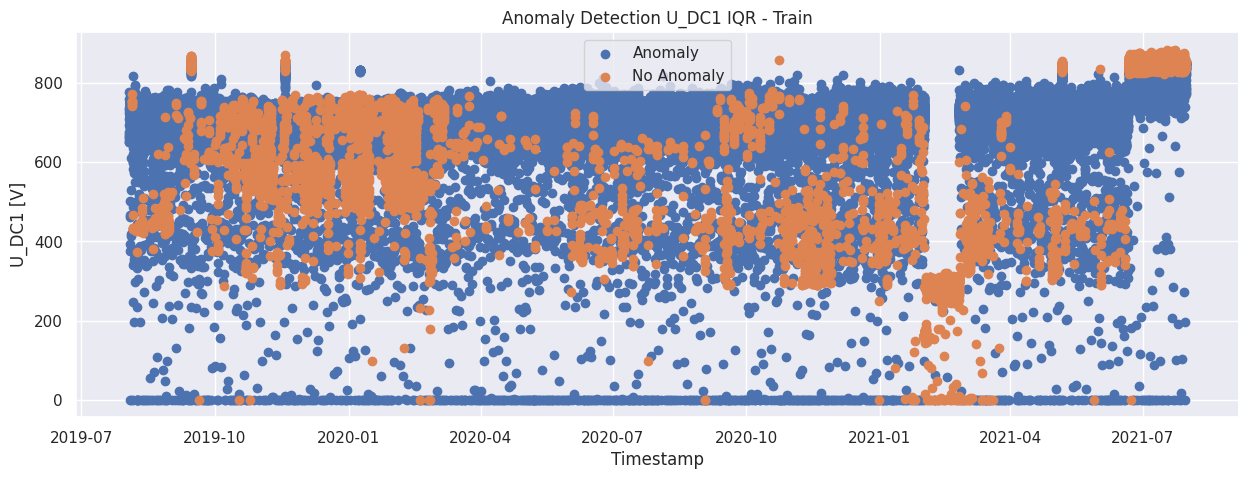

In [28]:
plt.figure(figsize=(15, 5))
plt.scatter(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['U_DC1'])
plt.scatter(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['U_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC1 [V]')
plt.title('Anomaly Detection U_DC1 IQR - Train')
plt.legend(['Anomaly','No Anomaly'])

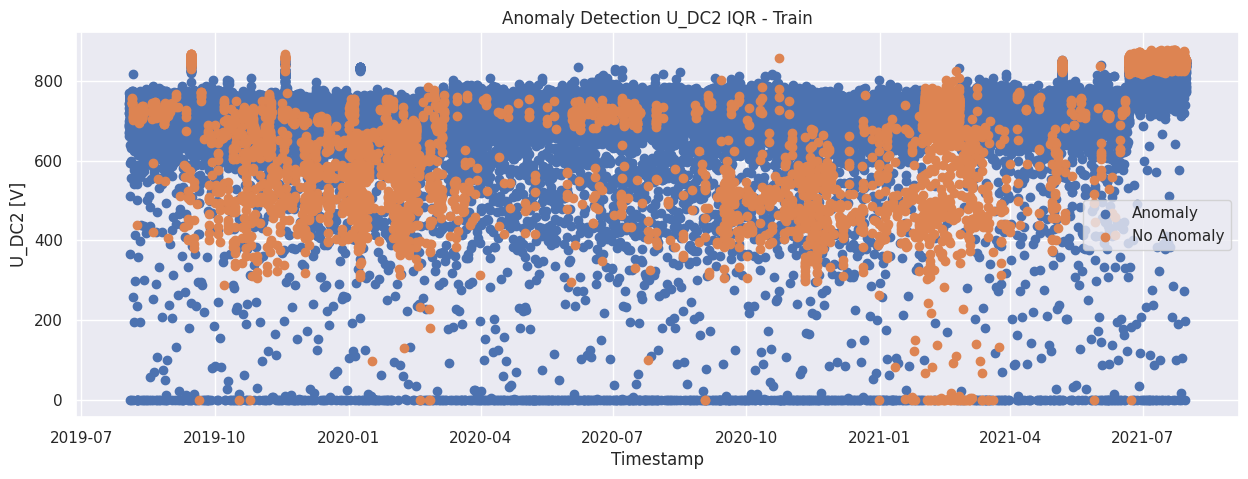

In [29]:
plt.figure(figsize=(15, 5))
plt.scatter(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['U_DC2'])
plt.scatter(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['U_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC2 [V]')
plt.title('Anomaly Detection U_DC2 IQR - Train')
plt.legend(['Anomaly','No Anomaly'])

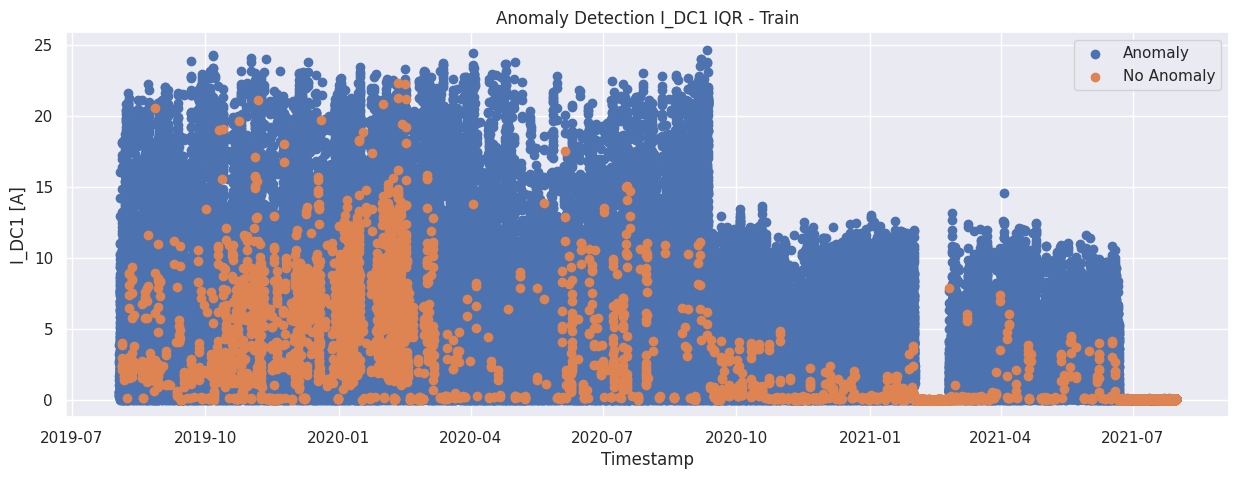

In [30]:
plt.figure(figsize=(15, 5))
plt.scatter(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['I_DC1'])
plt.scatter(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['I_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('I_DC1 [A]')
plt.title('Anomaly Detection I_DC1 IQR - Train')
plt.legend(['Anomaly','No Anomaly'])

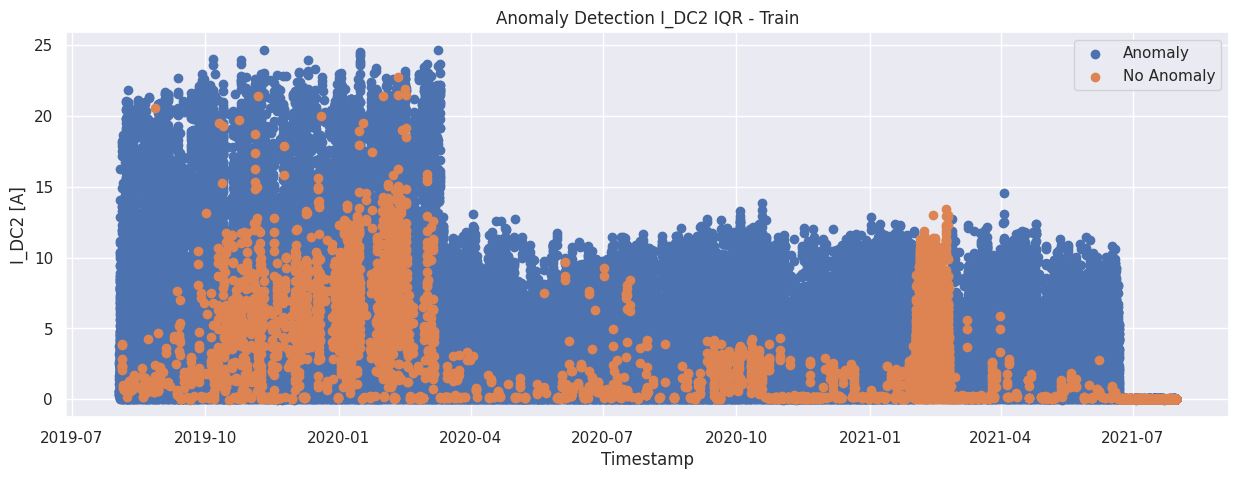

In [31]:
plt.figure(figsize=(15, 5))
plt.scatter(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['I_DC2'])
plt.scatter(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['I_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('I_DC2 [A]')
plt.title('Anomaly Detection I_DC2 IQR - Train')
plt.legend(['Anomaly','No Anomaly'])

In [32]:
merged_df_train

Timestamp    U_DC1    U_DC2  I_DC1  I_DC2      Time  \
0      2019-08-02 16:25:00  777.010  768.710  2.700  2.607  16:25:00   
1      2019-08-02 16:30:00  761.130  745.964  3.862  3.748  16:30:00   
2      2019-08-02 16:35:00  736.754  742.908  3.228  3.192  16:35:00   
3      2019-08-02 16:40:00  731.928  732.224  2.568  2.484  16:40:00   
4      2019-08-02 16:45:00  723.546  720.698  1.654  1.640  16:45:00   
...                    ...      ...      ...    ...    ...       ...   
102231 2021-07-30 17:10:00  788.168  788.084  0.020  0.050  17:10:00   
102232 2021-07-30 17:15:00  780.194  780.138  0.020  0.050  17:15:00   
102233 2021-07-30 17:20:00  772.618  772.588  0.020  0.050  17:20:00   
102234 2021-07-30 17:25:00  775.204  775.162  0.020  0.050  17:25:00   
102235 2021-07-30 17:30:00  784.286  784.220  0.020  0.050  17:30:00   

        Upper_UDC1  Upper_UDC2  Upper_IDC1  Upper_IDC2  ...  Lower_UDC2  \
0         923.7590    886.0335      8.4615      5.5035  ...    544.7240   
1         894.4745    880.3615      7.7855      5.1540  ...    549.4995   
2         901.4545    886.9950      7.6950      4.9345  ...    542.3745   
3         897.8275    876.7320      6.6050      4.4035  ...    549.6115   
4         884.6805    877.0080      5.9200      4.2875  ...    552.2990   
...            ...         ...         ...         ...  ...         ...   
102231    879.9830    853.7770      3.5355      2.5220  ...    545.4655   
102232    876.8885    844.2770      3.0220      2.2355  ...    547.4665   
102233    885.7275    837.7750      2.5680      1.8875  ...    544.8880   
102234    890.7275    837.6390      2.2820      1.6360  ...    535.2110   
102235    890.3870    849.7720      1.9100      1.4260  ...    510.6080   

        Lower_IDC1  Lower_IDC2  Anomaly_UDC1  Anomaly_UDC2  Anomaly_IDC1  \
0          -5.3775     -3.0575             0             0             0   
1          -4.8810     -2.8470             0             0             0   
2          -4.9155     -2.7480             0             0             0   
3          -4.1400     -2.3725             0             0             0   
4          -3.6700     -2.3520             0             0             0   
...            ...         ...           ...           ...           ...   
102231     -2.1940     -1.3560             0             0             0   
102232     -1.8710     -1.2050             0             0             0   
102233     -1.5795     -1.0035             0             0             0   
102234     -1.4315     -0.8630             0             0             0   
102235     -1.2120     -0.7790             0             0             0   

        Anomaly_IDC2  Anomaly_String1  Anomaly_String2  Anomaly  
0                  0                0                0        0  
1                  0                0                0        0  
2                  0                0                0        0  
3                  0                0                0        0  
4                  0                0                0        0  
...              ...              ...              ...      ...  
102231             0                0                0        0  
102232             0                0                0        0  
102233             0                0                0        0  
102234             0                0                0        0  
102235             0                0                0        0  

[102236 rows x 21 columns]

In [33]:
merged_df_train['Anomaly'].unique()

array([0, 1])

### *Datos de prueba*

In [34]:
#Agrupar con datos de prueba
merged_df_test = pd.merge(anomaly_data, iqr_values, how="inner", on=["Time"])

In [35]:
merged_df_test['Anomaly_UDC1'] = np.where((merged_df_test['U_DC1'] < merged_df_test['Lower_UDC1']) | (merged_df_test['U_DC1'] > merged_df_test['Upper_UDC1']), 1,0)
merged_df_test['Anomaly_UDC2'] = np.where((merged_df_test['U_DC2'] < merged_df_test['Lower_UDC2']) | (merged_df_test['U_DC2'] > merged_df_test['Upper_UDC2']), 1,0)
merged_df_test['Anomaly_IDC1'] = np.where((merged_df_test['I_DC1'] < merged_df_test['Lower_IDC1']) | (merged_df_test['I_DC1'] > merged_df_test['Upper_IDC1']), 1,0)
merged_df_test['Anomaly_IDC2'] = np.where((merged_df_test['I_DC2'] < merged_df_test['Lower_IDC2']) | (merged_df_test['I_DC2'] > merged_df_test['Upper_IDC2']), 1,0)

merged_df_test['Anomaly_String1'] = np.where((merged_df_test['Anomaly_UDC1'] == 1) | (merged_df_test['Anomaly_IDC1'] == 1), 1,0)
merged_df_test['Anomaly_String2'] = np.where((merged_df_test['Anomaly_UDC2'] == 1) | (merged_df_test['Anomaly_IDC2'] == 1), 1,0)

merged_df_test.loc[:,'Anomaly'] = np.where(
    (merged_df_test['Anomaly_String1'] == 1) |
    (merged_df_test['Anomaly_String2'] == 1),
    1,
    0
)

merged_df_test = merged_df_test.sort_values(by=['Timestamp'])

In [36]:
count0 = (merged_df_test['Anomaly'] == 0).sum()
count1 = (merged_df_test['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

9195 38967


In [37]:
anomaly_iqr_test = merged_df_test[merged_df_test['Anomaly'] == 1]
no_anomaly_iqr_test = merged_df_test[merged_df_test['Anomaly'] == 0]

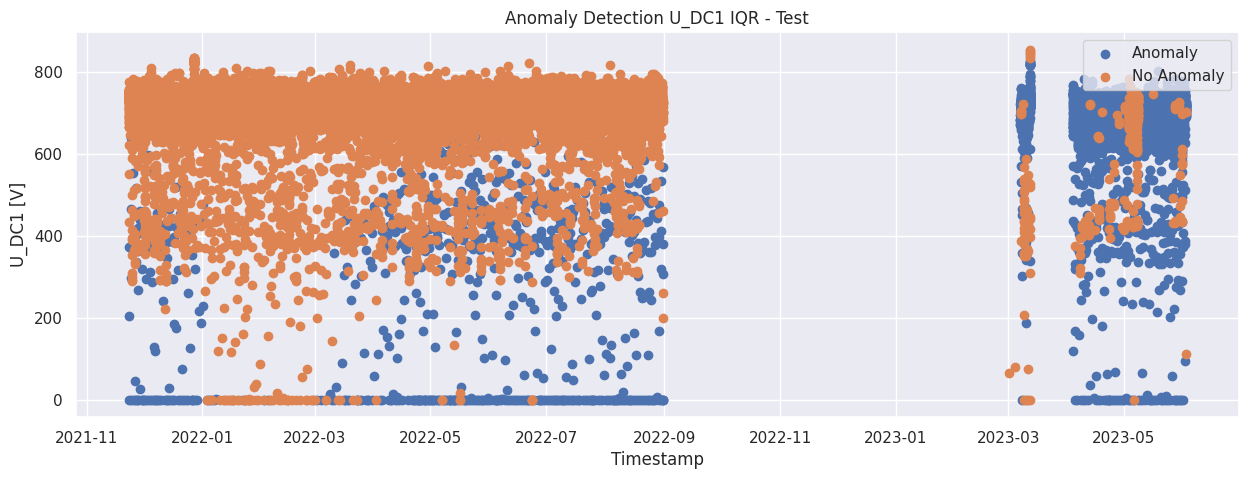

In [38]:
plt.figure(figsize=(15, 5))
plt.scatter(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['U_DC1'])
plt.scatter(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['U_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC1 [V]')
plt.title('Anomaly Detection U_DC1 IQR - Test')
plt.legend(['Anomaly','No Anomaly'])

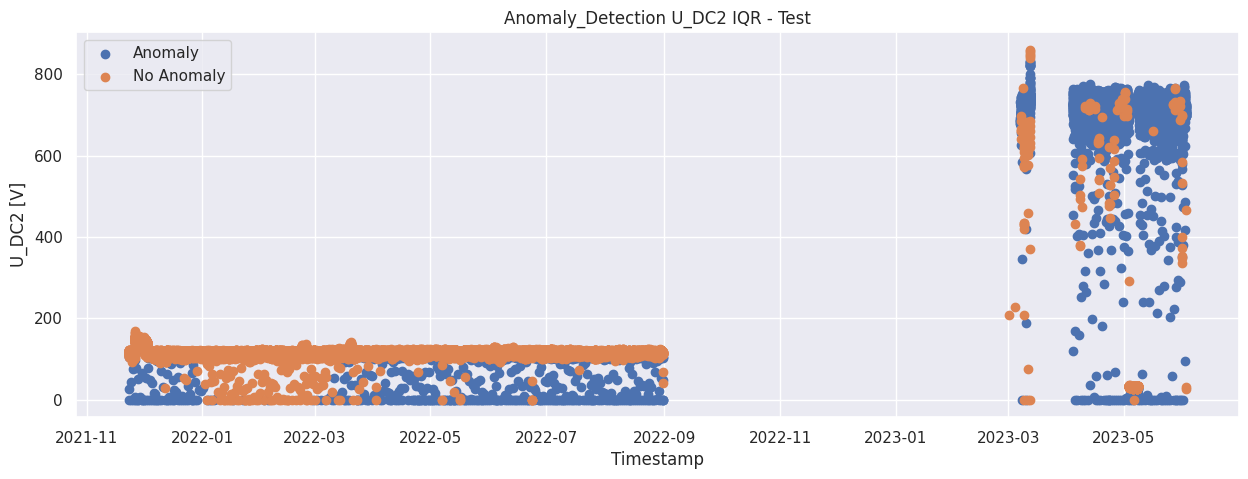

In [39]:
plt.figure(figsize=(15, 5))
plt.scatter(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['U_DC2'])
plt.scatter(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['U_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC2 [V]')
plt.title('Anomaly_Detection U_DC2 IQR - Test')
plt.legend(['Anomaly','No Anomaly'])

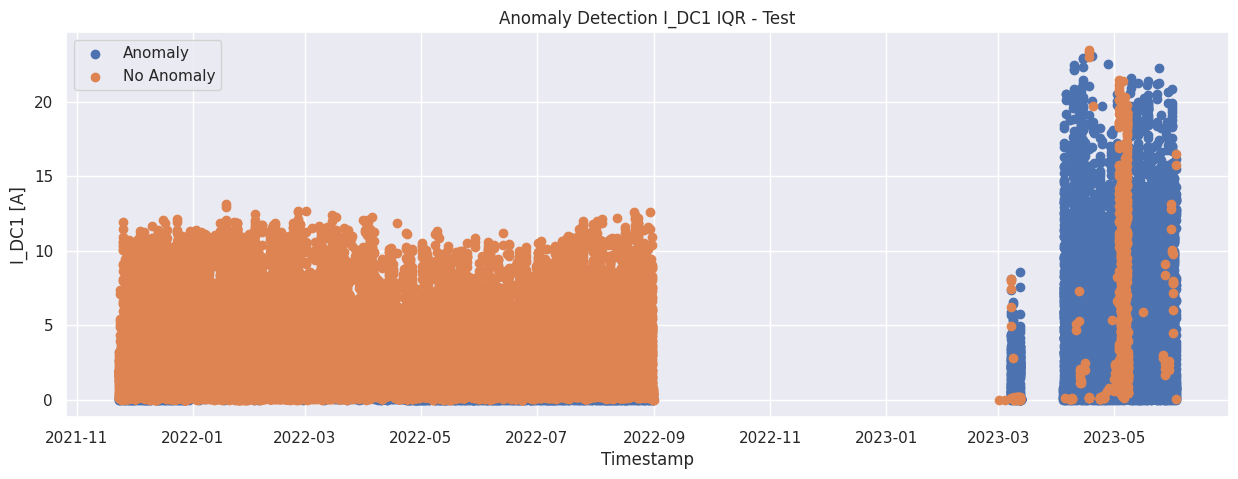

In [40]:
plt.figure(figsize=(15, 5))
plt.scatter(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['I_DC1'])
plt.scatter(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['I_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('I_DC1 [A]')
plt.title('Anomaly Detection I_DC1 IQR - Test')
plt.legend(['Anomaly','No Anomaly'])

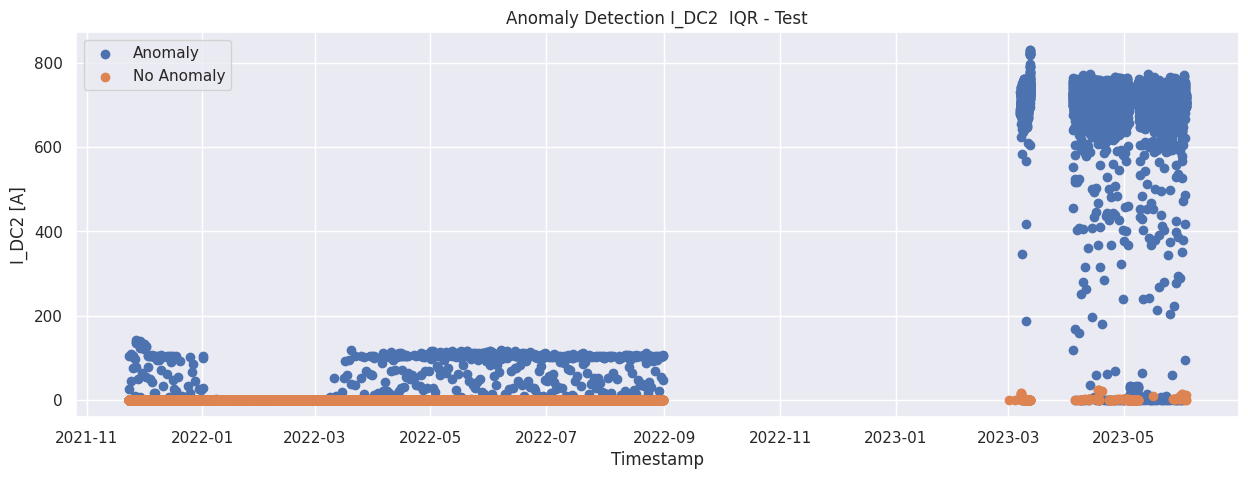

In [41]:
plt.figure(figsize=(15, 5))
plt.scatter(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['U_DC2'])
plt.scatter(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['I_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('I_DC2 [A]')
plt.title('Anomaly Detection I_DC2  IQR - Test')
plt.legend(['Anomaly','No Anomaly'])

In [42]:
statistical_anomaly_df = pd.concat([merged_df_train,merged_df_test])
statistical_anomaly_df = statistical_anomaly_df[['Timestamp','U_DC1','U_DC2','I_DC1','I_DC2','Anomaly']]

In [ ]:
#statistical_anomaly_df.to_csv('statistical_df_with_anomalies.csv', sep=';', index=False, encoding='utf-8')

## **MÉTODOS DE MACHINE LEARNING PARA DETECCIÓN DE ANOMALÍAS**



No supervisado

In [43]:
scaler = StandardScaler()

### *Método Isolation Forest*

In [ ]:
df_if = filtered_data

time = df_if[['Timestamp']]
rows_if = df_if[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_if = df_if[(df_if['Timestamp'] < '2021-09-03')]
df_test_if = df_if[(df_if['Timestamp'] >= '2021-09-03')]

scaled_df_if = scaler.fit_transform(rows_if)

x_train_if = scaled_df_if[0:102236]
x_test_if = scaled_df_if[102236:150398]

y_train_if = np.array(merged_df_train['Anomaly'])
y_train_if[y_train_if == 1] = -1
y_train_if[y_train_if == 0] = 1

y_test_if = np.array(merged_df_test['Anomaly'])
y_test_if[y_test_if == 1] = -1
y_test_if[y_test_if == 0] = 1

#### Datos de entrenamiento

In [ ]:
"""
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score

isolation_forest = IsolationForest(random_state=42)

scoring_if = {"Accuracy": make_scorer(accuracy_score),
              "Precision": make_scorer(precision_score),
              "Recall": make_scorer(recall_score),
              "F1-Score": make_scorer(f1_score)}

param_grid_if = {'n_estimators': np.array((range(100, 800, 50))),
              'bootstrap': np.array([True, False]),
              'max_features': np.array([1,2,3,4])}

grid_dt_estimator_if = model_selection.GridSearchCV(isolation_forest,
                                                 param_grid_if,
                                                 scoring=scoring_if,
                                                 refit='Accuracy',
                                                 cv=5,
                                                 return_train_score=True)

grid_dt_estimator_if.fit(x_train_if, y_train_if)



print("Best parameters found:")
print(grid_dt_estimator_if.best_params_)
"""
#Best Parameters
#bootstrap: False
#n_estimators = 150
#contamination = 'auto'
#max_samples= 'auto'
#max_features=2

'\nfrom sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score\n\nisolation_forest = IsolationForest(random_state=42)\n\nscoring_if = {"Accuracy": make_scorer(accuracy_score),\n              "Precision": make_scorer(precision_score),\n              "Recall": make_scorer(recall_score),\n              "F1-Score": make_scorer(f1_score)}\n\nparam_grid_if = {\'n_estimators\': np.array((range(100, 800, 50))),\n              \'bootstrap\': np.array([True, False]),\n              \'max_features\': np.array([1,2,3,4])}\n\ngrid_dt_estimator_if = model_selection.GridSearchCV(isolation_forest,\n                                                 param_grid_if,\n                                                 scoring=scoring_if,\n                                                 refit=\'Accuracy\',\n                                                 cv=5,\n                                                 return_train_score=True)\n\ngrid_dt_estimator_if.fit(x_train_if

In [ ]:
best_if_model = IsolationForest(random_state=42, bootstrap=False, n_estimators=150, contamination='auto',max_samples='auto',max_features=2)
#Train model
best_if_model.fit(x_train_if)
pred_if_model_train = np.array(best_if_model.predict(x_train_if))
df_train_if['Anomaly'] = pred_if_model_train

<ipython-input-91-3017a08d5125>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_if['Anomaly'] = pred_if_model_train


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(pred_if_model_train,y_train_if)
precision = precision_score(pred_if_model_train,y_train_if)
f1_score = f1_score(pred_if_model_train,y_train_if)
recall = recall_score(pred_if_model_train,y_train_if)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.8770711422630914
Accuracy: 0.859775421573614
F1_Score: 0.9194642937396073
Recall: 0.9661637269485962


In [ ]:
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = sum((y_act == -1) & (y_pred == -1))
    tn = sum((y_act == 1) & (y_pred == 1))
    fn = sum((y_act == -1) & (y_pred == 1))
    fp = sum((y_act == 1) & (y_pred == -1))
    return tp, tn, fp, fn

tp,tn,fn,fp = compute_tp_tn_fn_fp(y_train_if,pred_if_model_train)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 6064
Number of TN: 81836
Number of FP: 2866
Number of FN: 11470


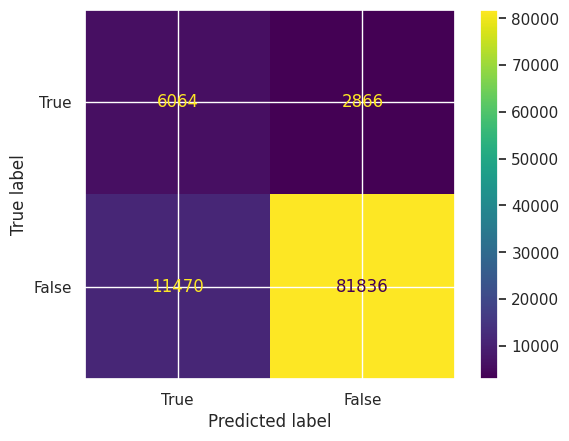

In [ ]:
cm_train = confusion_matrix(y_train_if,pred_if_model_train)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [ ]:
count0 = (df_train_if['Anomaly'] == 1).sum()
count1 = (df_train_if['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

84702 17534


In [ ]:
anomaly_if_train = df_train_if[df_train_if['Anomaly'] == -1]
no_anomaly_if_train = df_train_if[df_train_if['Anomaly'] == 1]

In [ ]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_train['Timestamp'].isin(anomaly_if_train['Timestamp']).sum())

6064


<ipython-input-97-3e70a979fe04>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_train['Timestamp'].isin(anomaly_if_train['Timestamp']).sum())


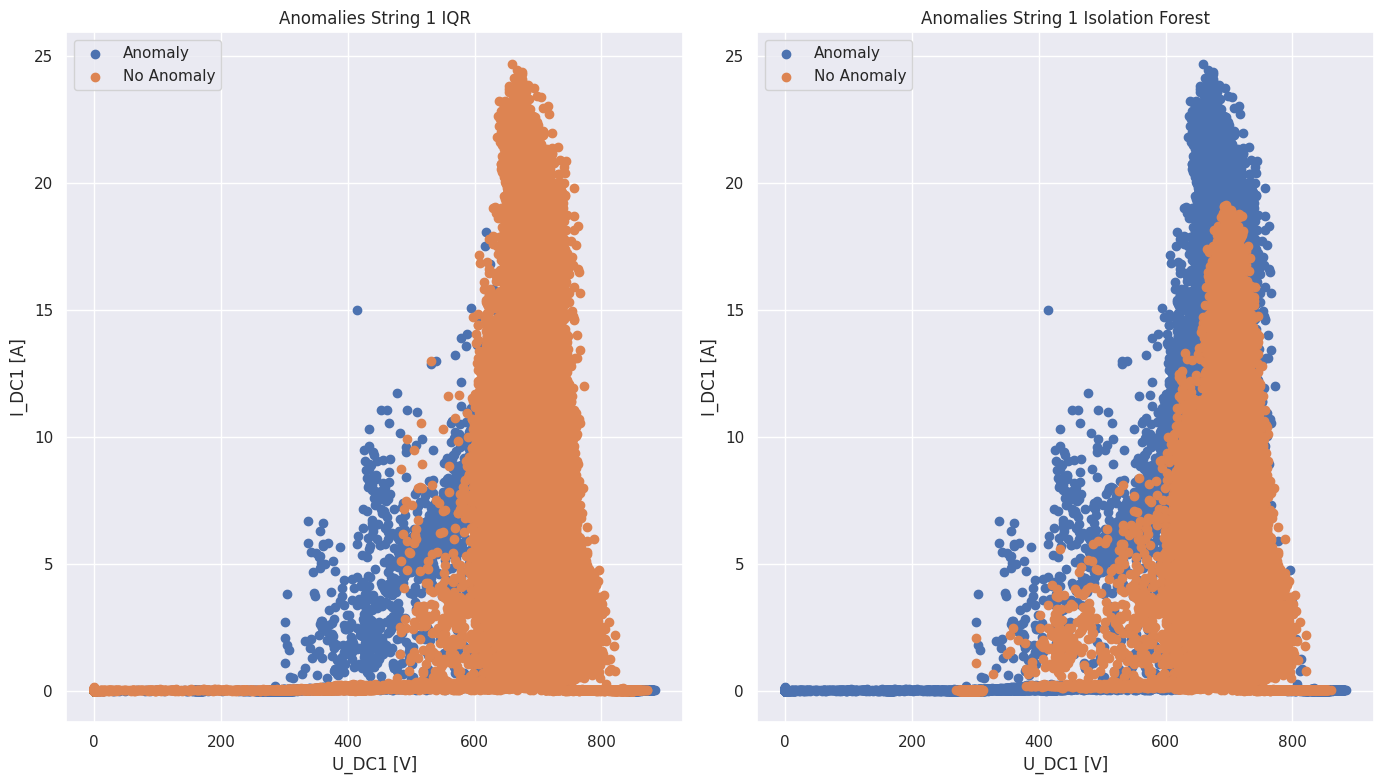

In [ ]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC1'], anomaly_iqr_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC1'], no_anomaly_iqr_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_if_train['U_DC1'], anomaly_if_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_if_train['U_DC1'], no_anomaly_if_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 Isolation Forest')


# Ajustes de diseño
plt.tight_layout()
plt.show()

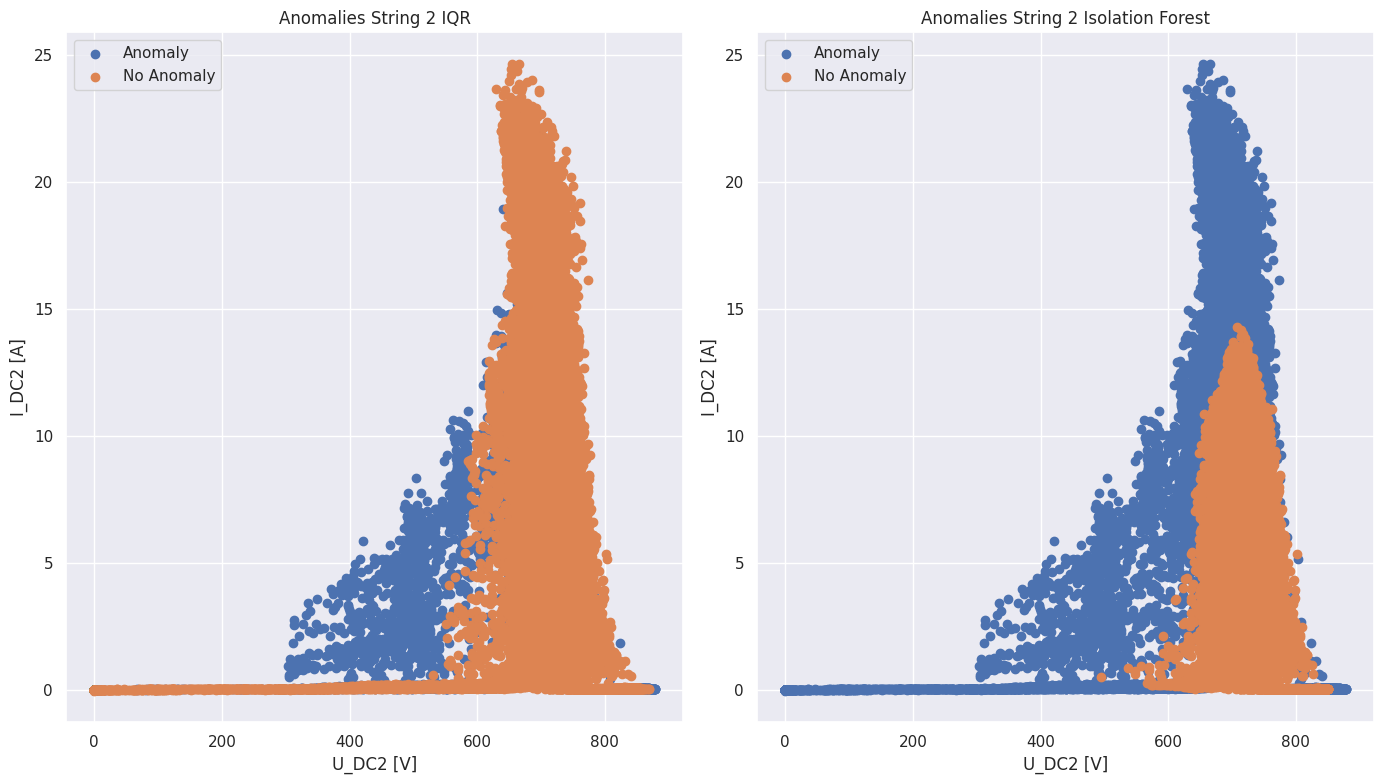

In [ ]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC2'], anomaly_iqr_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC2'], no_anomaly_iqr_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_if_train['U_DC2'], anomaly_if_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_if_train['U_DC2'], no_anomaly_if_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 Isolation Forest')


# Ajustes de diseño
plt.tight_layout()
plt.show()

#### Datos de Prueba

In [ ]:
pred_if_model_test = np.array(best_if_model.predict(x_test_if))
df_test_if['Anomaly'] = pred_if_model_test

<ipython-input-100-c27f45b4a664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_if['Anomaly'] = pred_if_model_test


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_test_if,pred_if_model_test)
precision = precision_score(y_test_if,pred_if_model_test)
f1_score = f1_score(y_test_if,pred_if_model_test)
recall = recall_score(y_test_if,pred_if_model_test)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9941333333333333
Accuracy: 0.9629791121631162
F1_Score: 0.8932015573525007
Recall: 0.8108754758020663


In [ ]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(y_test_if,pred_if_model_test)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 38923
Number of TN: 7456
Number of FP: 44
Number of FN: 1739


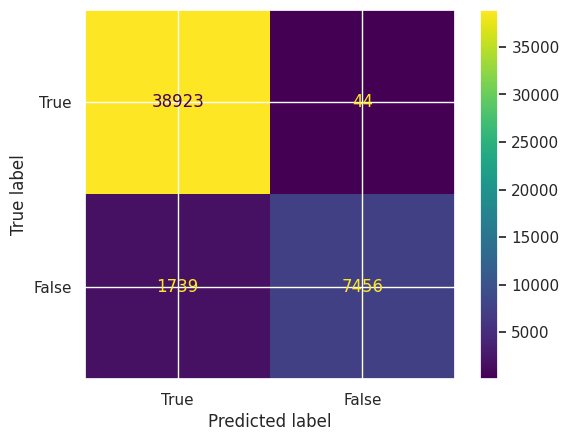

In [ ]:
cm_test = confusion_matrix(y_test_if,pred_if_model_test)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [ ]:
count0 = (df_test_if['Anomaly'] == 1).sum()
count1 = (df_test_if['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

7500 40662


In [ ]:
anomaly_if_test = df_test_if[df_test_if['Anomaly'] == -1]
no_anomaly_if_test = df_test_if[df_test_if['Anomaly'] == 1]

In [ ]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_test['Timestamp'].isin(anomaly_if_test['Timestamp']).sum())

38923


<ipython-input-106-875fc83953b8>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_test['Timestamp'].isin(anomaly_if_test['Timestamp']).sum())


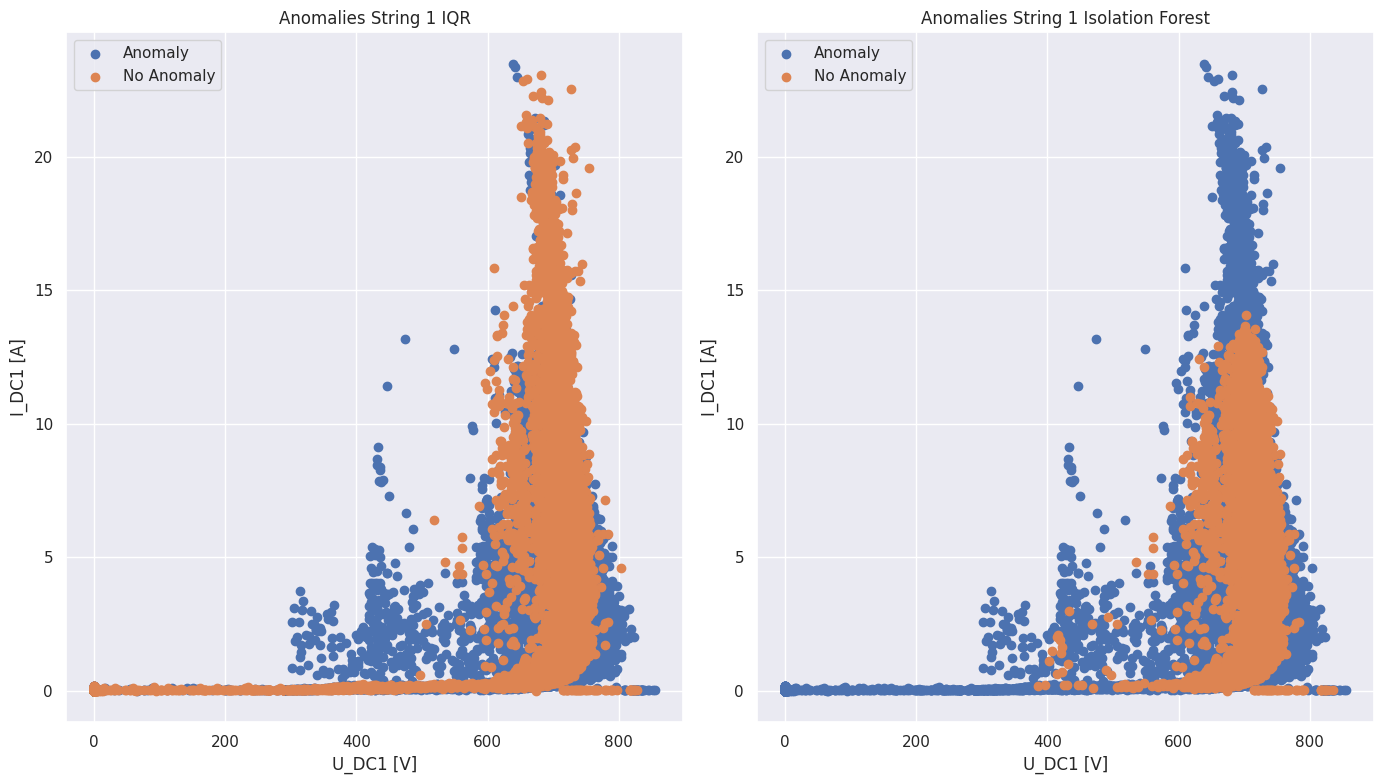

In [ ]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_if_test['U_DC1'], anomaly_if_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_if_test['U_DC1'], no_anomaly_if_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 Isolation Forest')


# Ajustes de diseño
plt.tight_layout()
plt.show()

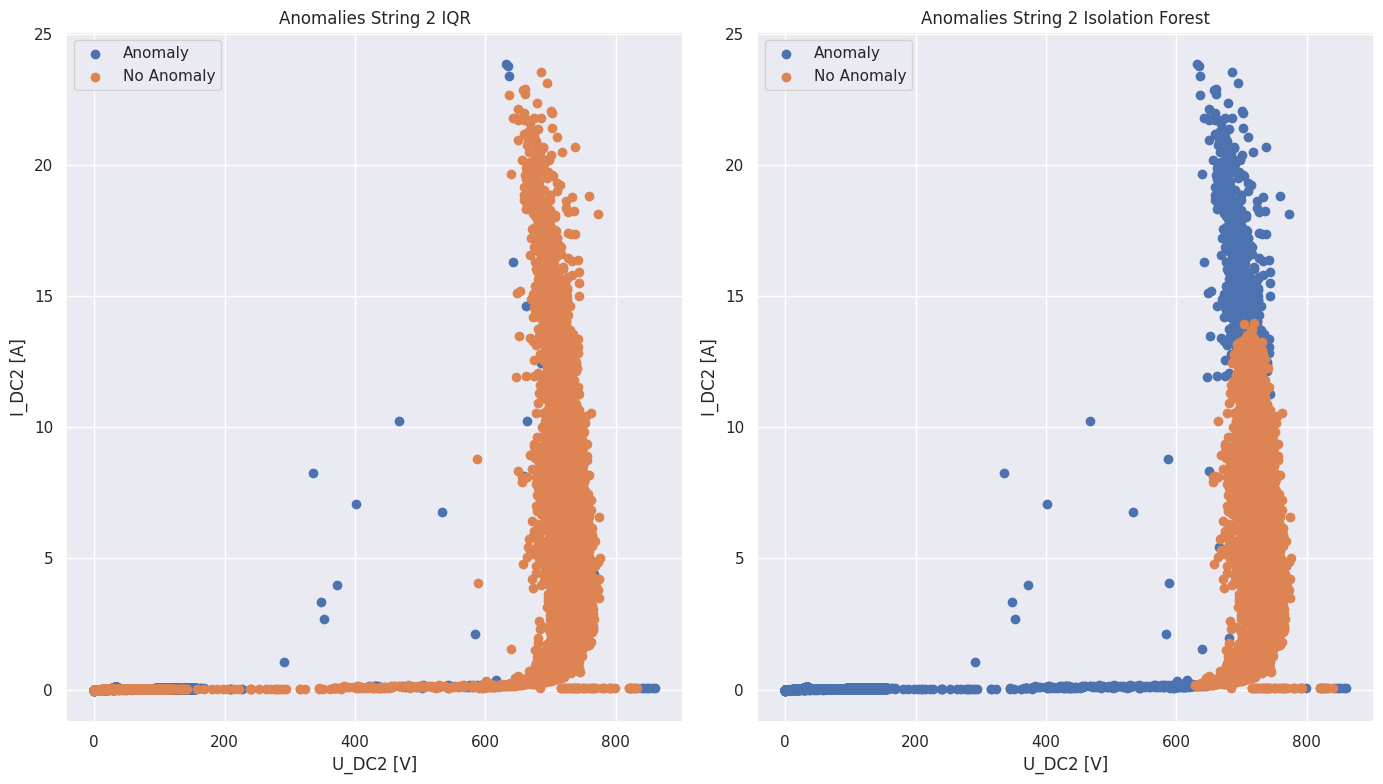

In [ ]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_if_test['U_DC2'], anomaly_if_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_if_test['U_DC2'], no_anomaly_if_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 Isolation Forest')


# Ajustes de diseño
plt.tight_layout()
plt.show()

### *Método One-Class-SVM*

In [ ]:
df_oc_svm = filtered_data

time = df_oc_svm[['Timestamp']]
rows_oc_svm = df_oc_svm[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_oc_svm = df_oc_svm[(df_oc_svm['Timestamp'] < '2021-09-03')]
df_test_oc_svm = df_oc_svm[(df_oc_svm['Timestamp'] >= '2021-09-03')]

#scaler_gpu = cpp.StandardScaler()
scaled_df_oc_svm = scaler.fit_transform(rows_oc_svm)

x_train_oc_svm = scaled_df_oc_svm[0:102236]
x_test_oc_svm = scaled_df_oc_svm[102236:150398]

y_train_oc_svm = merged_df_train['Anomaly']
y_train_oc_svm[y_train_oc_svm == 1] = -1
y_train_oc_svm[y_train_oc_svm == 0] = 1

y_test_oc_svm = merged_df_test['Anomaly']
y_test_oc_svm[y_test_oc_svm == 1] = -1
y_test_oc_svm[y_test_oc_svm == 0] = 1

<ipython-input-109-674b6137191d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_oc_svm[y_train_oc_svm == 1] = -1
<ipython-input-109-674b6137191d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_oc_svm[y_train_oc_svm == 0] = 1
<ipython-input-109-674b6137191d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_oc_svm[y_test_oc_svm == 1] = -1
<ipython-input-109-674b6137191d>:21: SettingWithCopyWarning: 
A value 

#### Datos de entrenamiento

In [ ]:
"""
#One-Class SVM
svm_model = cuml.

param_grid_svm = {'nu': np.array(np.arange(0.01,1,0.01)),
                  'kernel': np.array(['linear', 'poly', 'rbf', 'sigmoid']),
                  'gamma': np.array(['scale', 'auto'])}


grid_svm_estimator = cuml.model_selection.GridSearchCV(svm_model,
                                                  param_grid_svm,
                                                  scoring='accuracy',
                                                  cv=5)

grid_svm_estimator.fit(x_train_oc_svm, y_train_oc_svm)


print("Best parameters found for One Class-SVM:")
print(grid_svm_estimator.best_params_)
"""
#Best Parameters Found
#gamma: auto
#kernel: rbf
#nu = 0.01

'\n#One-Class SVM\nsvm_model = cuml.\n\nparam_grid_svm = {\'nu\': np.array(np.arange(0.01,1,0.01)),\n                  \'kernel\': np.array([\'linear\', \'poly\', \'rbf\', \'sigmoid\']),\n                  \'gamma\': np.array([\'scale\', \'auto\'])}\n\n\ngrid_svm_estimator = cuml.model_selection.GridSearchCV(svm_model,\n                                                  param_grid_svm,\n                                                  scoring=\'accuracy\',\n                                                  cv=5)\n\ngrid_svm_estimator.fit(x_train_oc_svm, y_train_oc_svm)\n\n\nprint("Best parameters found for One Class-SVM:")\nprint(grid_svm_estimator.best_params_)\n'

In [ ]:
best_svm_model = OneClassSVM(nu=0.01,kernel='rbf',gamma='auto')
best_svm_model.fit(x_train_oc_svm)
pred_oc_svm_model_train = np.array(best_svm_model.predict(x_train_oc_svm))
df_train_oc_svm['Anomaly'] = pred_oc_svm_model_train

<ipython-input-111-f3cc3da28f53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_oc_svm['Anomaly'] = pred_oc_svm_model_train


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_train_oc_svm, pred_oc_svm_model_train)
precision = precision_score(y_train_oc_svm, pred_oc_svm_model_train)
f1_score = f1_score(y_train_oc_svm, pred_oc_svm_model_train)
recall = recall_score(y_train_oc_svm, pred_oc_svm_model_train)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9162577625953973
Accuracy: 0.9121346688055089
F1_Score: 0.9538369828308315
Recall: 0.994630570381326


In [ ]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(y_train_oc_svm, pred_oc_svm_model_train)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 448
Number of TN: 92805
Number of FP: 8482
Number of FN: 501


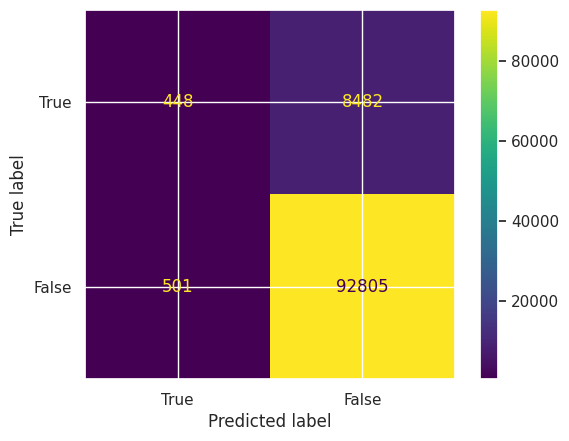

In [ ]:
cm_train = confusion_matrix(y_train_oc_svm, pred_oc_svm_model_train)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [ ]:
count0 = (df_train_oc_svm['Anomaly'] == 1).sum()
count1 = (df_train_oc_svm['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

101287 949


In [ ]:
anomaly_oc_svm_train = df_train_oc_svm[df_train_oc_svm['Anomaly'] == -1]
no_anomaly_oc_svm_train = df_train_oc_svm[df_train_oc_svm['Anomaly'] == 1]

In [ ]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_train['Timestamp'].isin(anomaly_oc_svm_train['Timestamp']).sum())

448


<ipython-input-117-28ce1dcebe3b>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_train['Timestamp'].isin(anomaly_oc_svm_train['Timestamp']).sum())


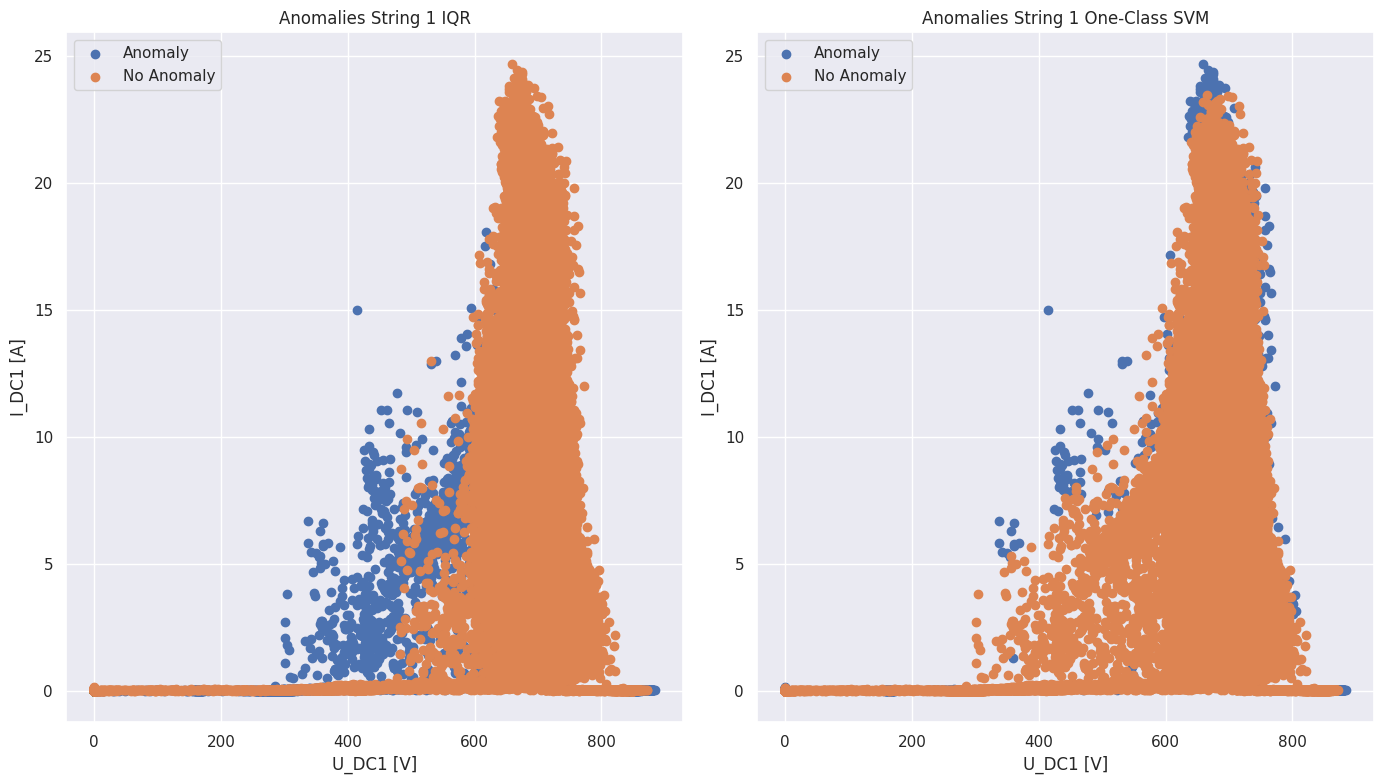

In [ ]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC1'], anomaly_iqr_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC1'], no_anomaly_iqr_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_oc_svm_train['U_DC1'], anomaly_oc_svm_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_oc_svm_train['U_DC1'], no_anomaly_oc_svm_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 One-Class SVM')


# Ajustes de diseño
plt.tight_layout()
plt.show()

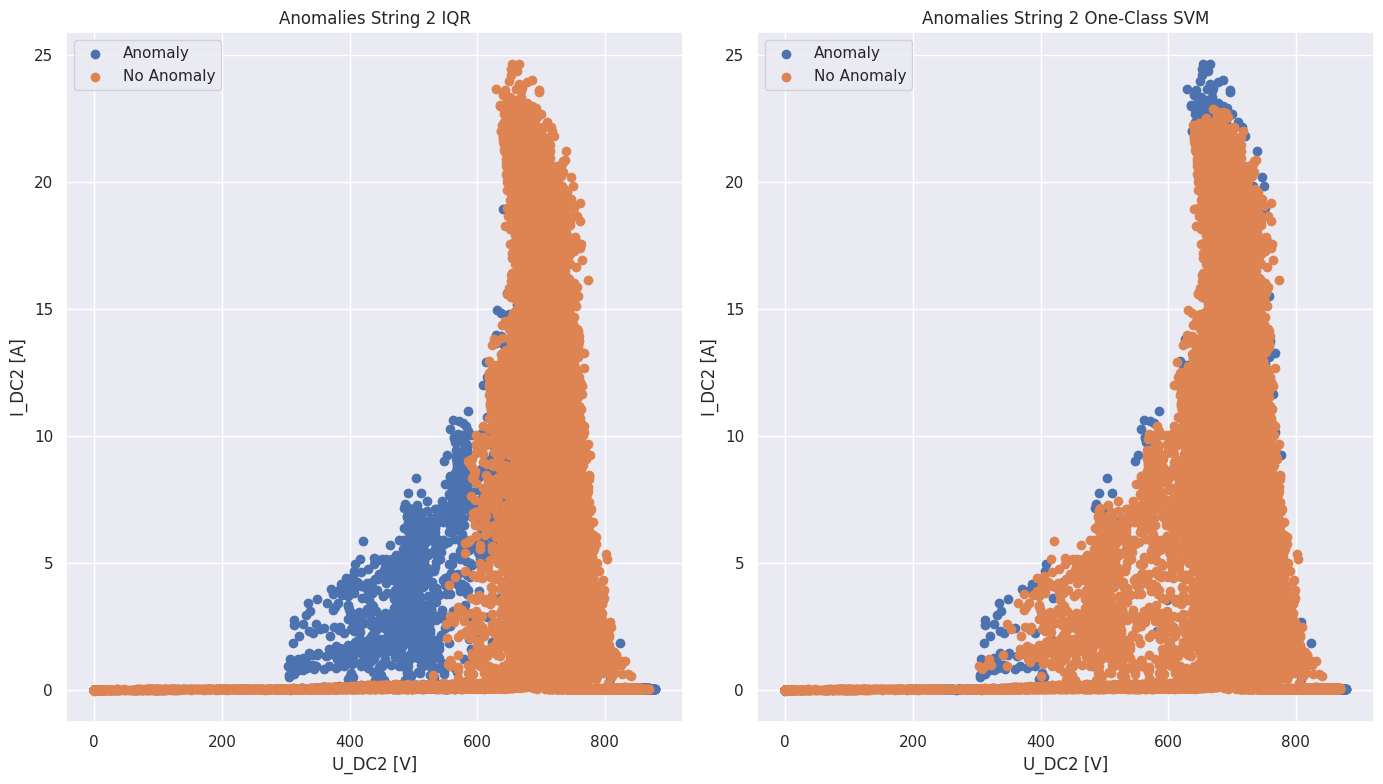

In [ ]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC2'], anomaly_iqr_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC2'], no_anomaly_iqr_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_oc_svm_train['U_DC2'], anomaly_oc_svm_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_oc_svm_train['U_DC2'], no_anomaly_oc_svm_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 One-Class SVM')


# Ajustes de diseño
plt.tight_layout()
plt.show()

#### Datos de Prueba

In [ ]:
pred_oc_svm_model_test = np.array(best_svm_model.predict(x_test_oc_svm))
df_test_oc_svm['Anomaly'] = pred_oc_svm_model_test

<ipython-input-120-805ce3812738>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_oc_svm['Anomaly'] = pred_oc_svm_model_test


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_test_oc_svm,pred_oc_svm_model_test)
precision = precision_score(y_test_oc_svm,pred_oc_svm_model_test)
f1_score = f1_score(y_test_oc_svm,pred_oc_svm_model_test)
recall = recall_score(y_test_oc_svm,pred_oc_svm_model_test)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9811495316294668
Accuracy: 0.9818529130850048
F1_Score: 0.9510144602623024
Recall: 0.9226753670473083


In [ ]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(y_test_oc_svm,pred_oc_svm_model_test)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 38804
Number of TN: 8484
Number of FP: 163
Number of FN: 711


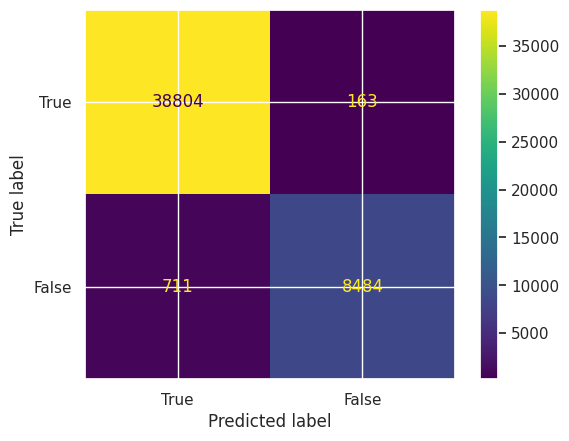

In [ ]:
cm_test = confusion_matrix(y_test_oc_svm,pred_oc_svm_model_test)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [ ]:
count0 = (df_test_oc_svm['Anomaly'] == 1).sum()
count1 = (df_test_oc_svm['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

8647 39515


In [ ]:
anomaly_oc_svm_test = df_test_oc_svm[df_test_oc_svm['Anomaly'] == -1]
no_anomaly_oc_svm_test = df_test_oc_svm[df_test_oc_svm['Anomaly'] == 1]

In [ ]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_test['Timestamp'].isin(anomaly_oc_svm_test['Timestamp']).sum())

38804


<ipython-input-126-76430140553d>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_test['Timestamp'].isin(anomaly_oc_svm_test['Timestamp']).sum())


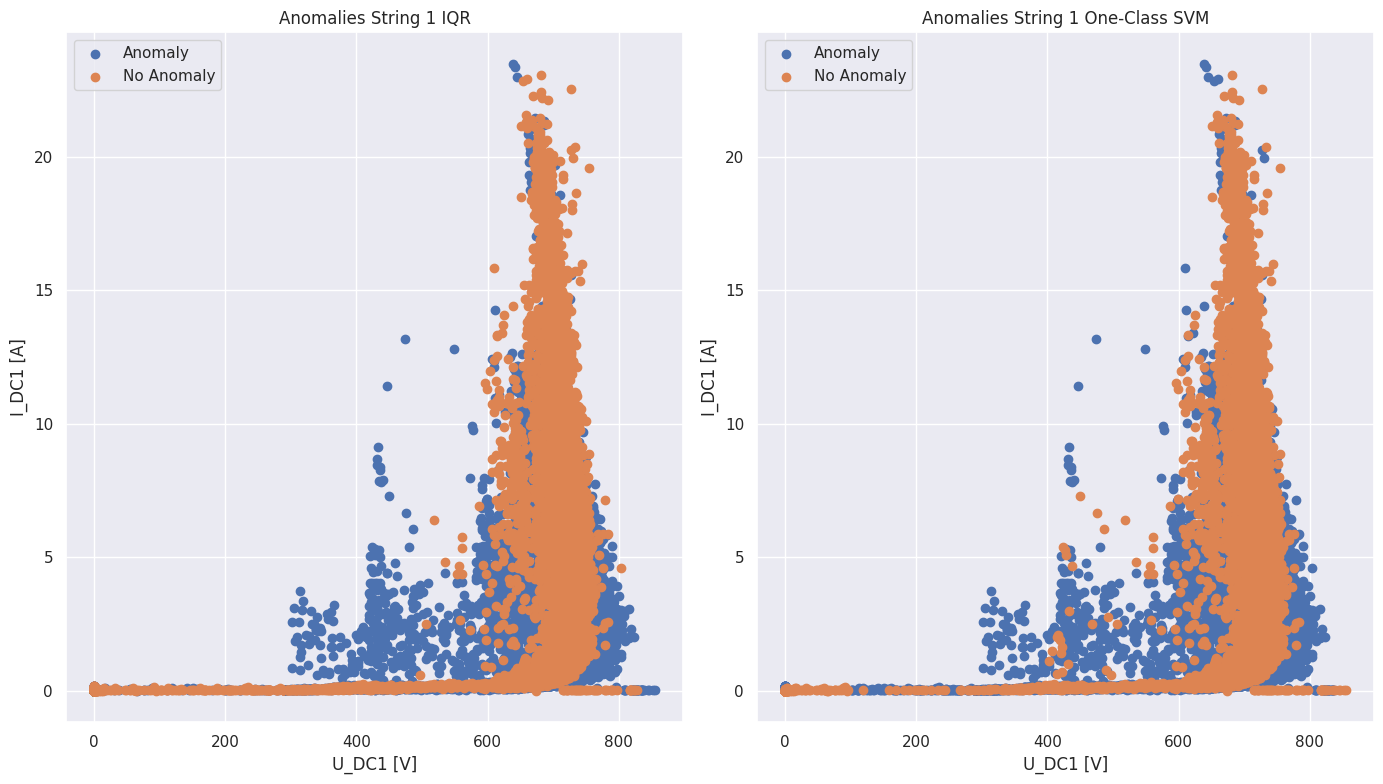

In [ ]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_oc_svm_test['U_DC1'], anomaly_oc_svm_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_oc_svm_test['U_DC1'], no_anomaly_oc_svm_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 One-Class SVM')


# Ajustes de diseño
plt.tight_layout()
plt.show()

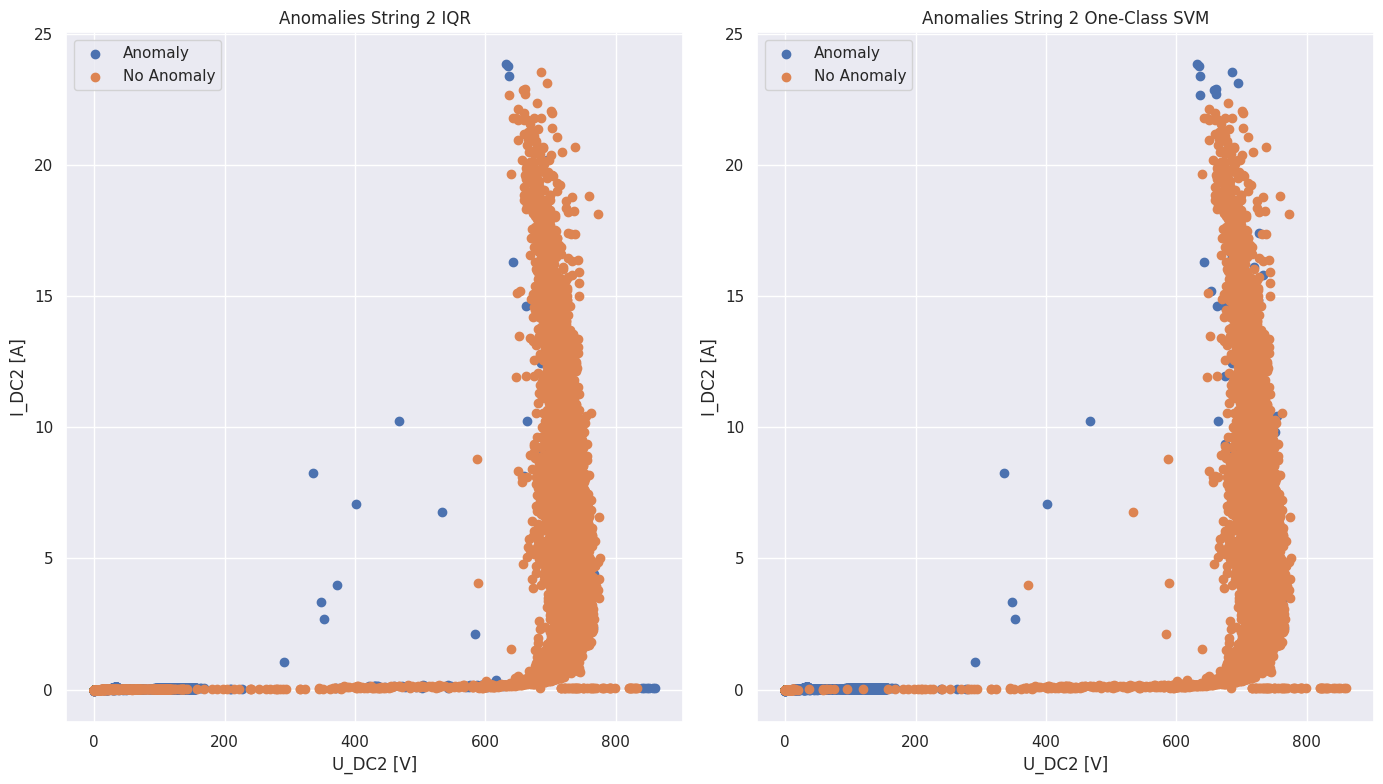

In [ ]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_oc_svm_test['U_DC2'], anomaly_oc_svm_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_oc_svm_test['U_DC2'], no_anomaly_oc_svm_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 One-Class SVM')


# Ajustes de diseño
plt.tight_layout()
plt.show()

### *Método Local Outlier Factor*

In [ ]:
df_lof = filtered_data

time = df_lof[['Timestamp']]
rows_lof = df_lof[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_lof = df_lof[(df_lof['Timestamp'] < '2021-09-03')]
df_test_lof = df_lof[(df_lof['Timestamp'] >= '2021-09-03')]

scaled_df_lof = scaler.fit_transform(rows_lof)

x_train_lof = scaled_df_lof[0:102236]
x_test_lof = scaled_df_lof[102236:150398]

In [ ]:
y_train_lof = np.array(merged_df_train['Anomaly'])

In [ ]:
np.unique(y_train_lof)

array([-1,  1])

In [ ]:
y_train_lof[y_train_lof == 1] = -1
y_train_lof[y_train_lof == 0] = 1

In [ ]:
y_test_lof = np.array(merged_df_test['Anomaly'])
#y_test_lof[y_test_lof == 1] = -1
#y_test_lof[y_test_lof == 0] = 1

In [ ]:
np.unique(y_test_lof)

array([-1,  1])

In [ ]:
y_train_lof

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
np.count_nonzero(y_train_lof == -1)

8930

In [ ]:
np.count_nonzero(y_train_lof == 1)

93306

#### Datos de entrenamiento

In [ ]:
"""
lof_model = LocalOutlierFactor(novelty=True)



param_grid_lof = {'n_neighbors': np.arange(5,50,5)}

grid_lof_estimator = model_selection.GridSearchCV(lof_model,
                                                  param_grid_lof,
                                                  scoring='accuracy',
                                                  cv=5,
                                                  n_jobs=-1)

grid_lof_estimator.fit(x_train_lof, y_train_lof)


print("Best parameters found in Isolation Forest:")
print(grid_lof_estimator.best_params_)
"""
#Best parameters
#n_neighbors=10

'\nlof_model = LocalOutlierFactor(novelty=True)\n\n\n\nparam_grid_lof = {\'n_neighbors\': np.arange(5,50,5)}\n\ngrid_lof_estimator = model_selection.GridSearchCV(lof_model,\n                                                  param_grid_lof,\n                                                  scoring=\'accuracy\',\n                                                  cv=5,\n                                                  n_jobs=-1)\n\ngrid_lof_estimator.fit(x_train_lof, y_train_lof)\n\n\nprint("Best parameters found in Isolation Forest:")\nprint(grid_lof_estimator.best_params_)\n'

In [ ]:
best_lof = LocalOutlierFactor(n_neighbors=10,contamination='auto',novelty=True)
best_lof.fit(x_train_lof)
pred_lof_model_train = np.array(best_lof.predict(x_train_lof))
df_train_lof['Anomaly'] = pred_lof_model_train

<ipython-input-174-430e5c26487f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_lof['Anomaly'] = pred_lof_model_train


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_train_lof, pred_lof_model_train)
precision = precision_score(y_train_lof, pred_lof_model_train)
f1_score = f1_score(y_train_lof, pred_lof_model_train)
recall = recall_score(y_train_lof, pred_lof_model_train)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9139235207940921
Accuracy: 0.8998493681286436
F1_Score: 0.9471254395885297
Recall: 0.9828306861295093


In [ ]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(y_train_lof, pred_lof_model_train)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 293
Number of TN: 91704
Number of FP: 8637
Number of FN: 1602


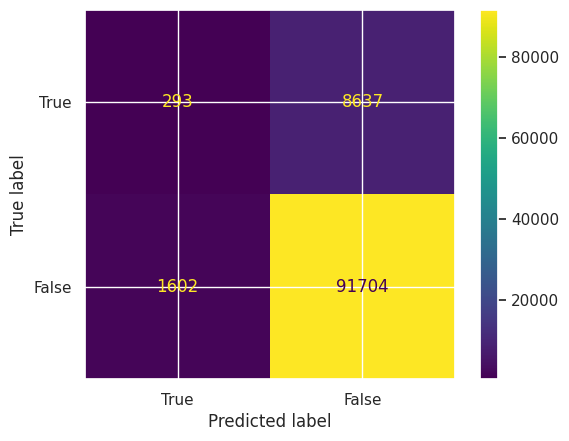

In [ ]:
cm_train = confusion_matrix(y_train_lof, pred_lof_model_train)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [ ]:
count0 = (df_train_lof['Anomaly'] == 1).sum()
count1 = (df_train_lof['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

100341 1895


In [ ]:
anomaly_lof_train = df_train_lof[df_train_lof['Anomaly'] == -1]
no_anomaly_lof_train = df_train_lof[df_train_lof['Anomaly'] == 1]

In [ ]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_train['Timestamp'].isin(anomaly_lof_train['Timestamp']).sum())

293


<ipython-input-180-158d99d1cd2b>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_train['Timestamp'].isin(anomaly_lof_train['Timestamp']).sum())


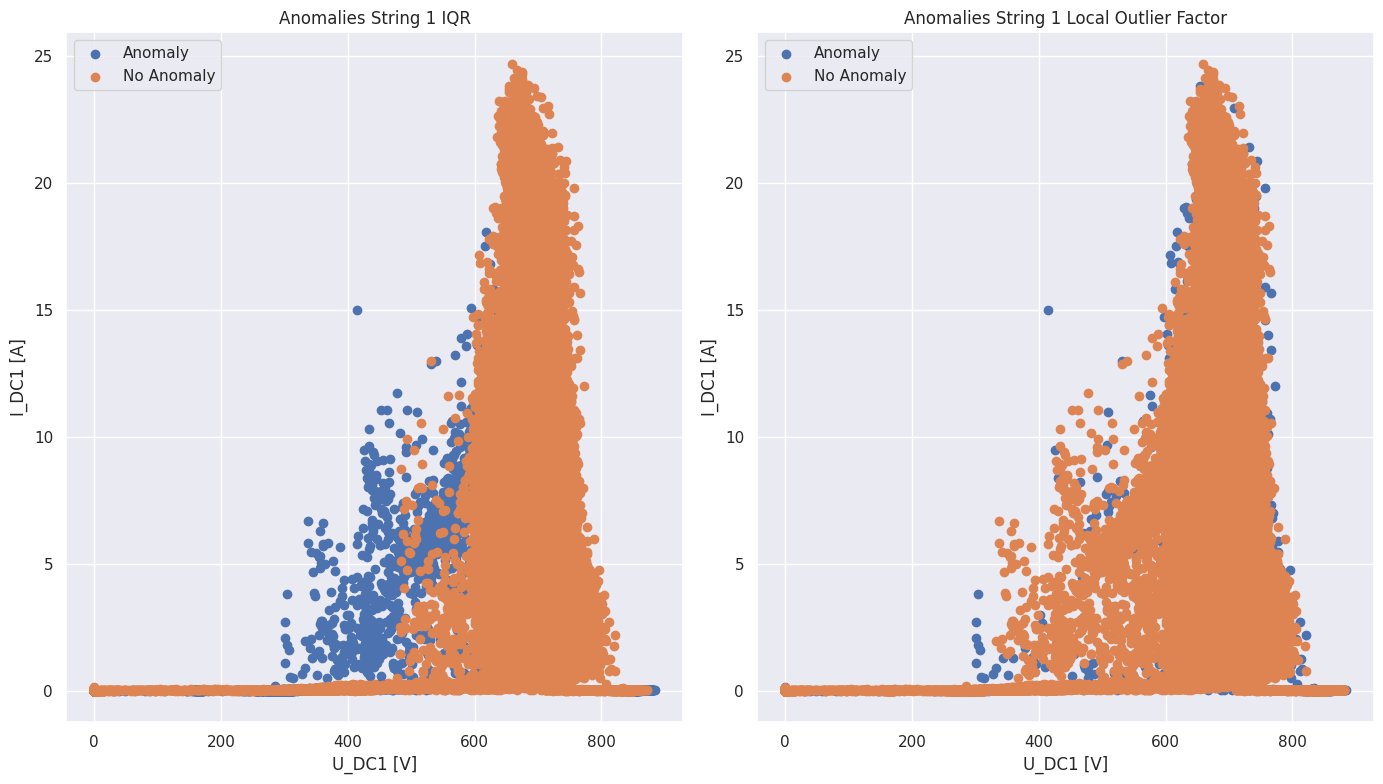

In [ ]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC1'], anomaly_iqr_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC1'], no_anomaly_iqr_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_lof_train['U_DC1'], anomaly_lof_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_lof_train['U_DC1'], no_anomaly_lof_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 Local Outlier Factor')


# Ajustes de diseño
plt.tight_layout()
plt.show()

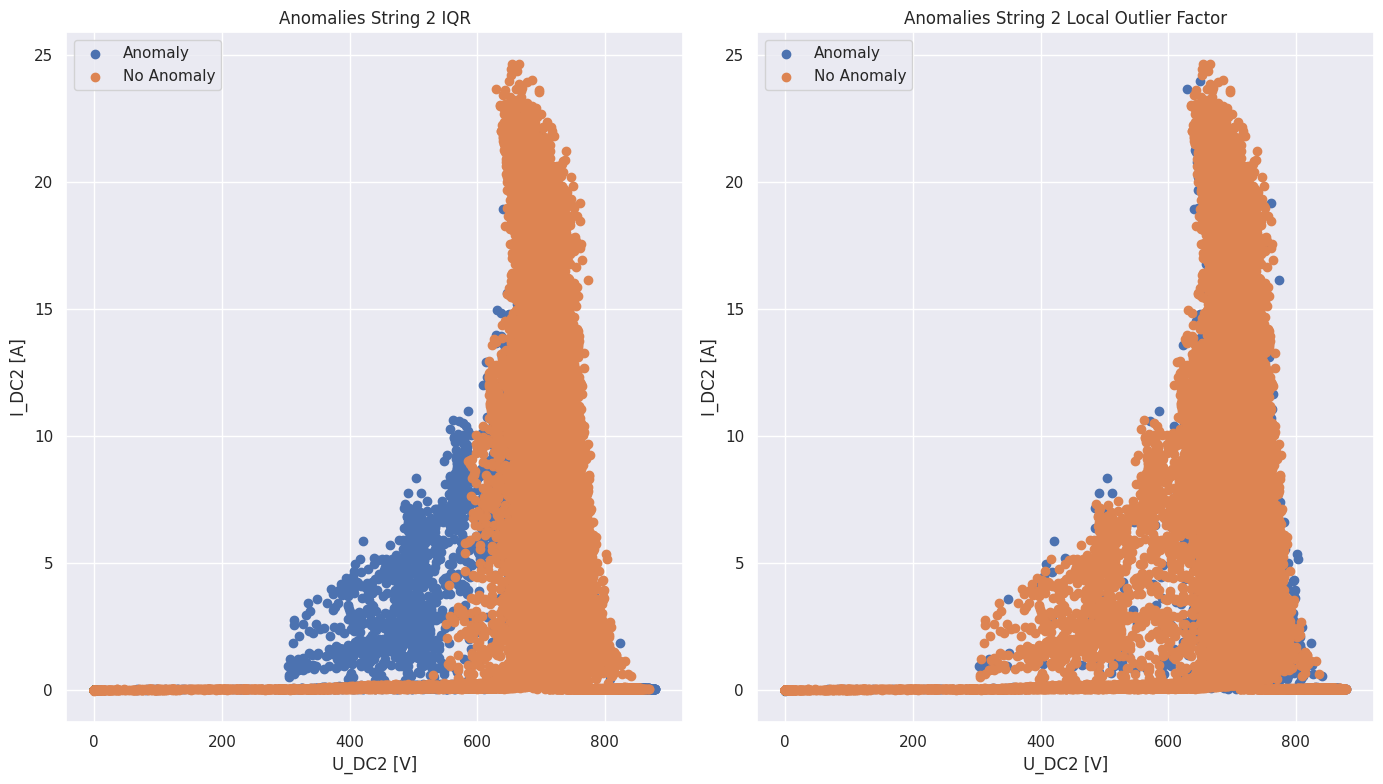

In [ ]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC2'], anomaly_iqr_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC2'], no_anomaly_iqr_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_lof_train['U_DC2'], anomaly_lof_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_lof_train['U_DC2'], no_anomaly_lof_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 Local Outlier Factor')


# Ajustes de diseño
plt.tight_layout()
plt.show()

#### Datos de prueba

In [ ]:
pred_lof_model_test = np.array(best_lof.predict(x_test_lof))
df_test_lof['Anomaly'] = pred_lof_model_test

<ipython-input-207-4feff52ca1de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_lof['Anomaly'] = pred_lof_model_test


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_test_lof, pred_lof_model_test)
precision = precision_score(y_test_lof, pred_lof_model_test)
f1_score = f1_score(y_test_lof, pred_lof_model_test)
recall = recall_score(y_test_lof, pred_lof_model_test)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9791666666666666
Accuracy: 0.970495411320128
F1_Score: 0.9178944935575201
Recall: 0.8638390429581294


In [ ]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(y_test_lof, pred_lof_model_test)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 38798
Number of TN: 7943
Number of FP: 169
Number of FN: 1252


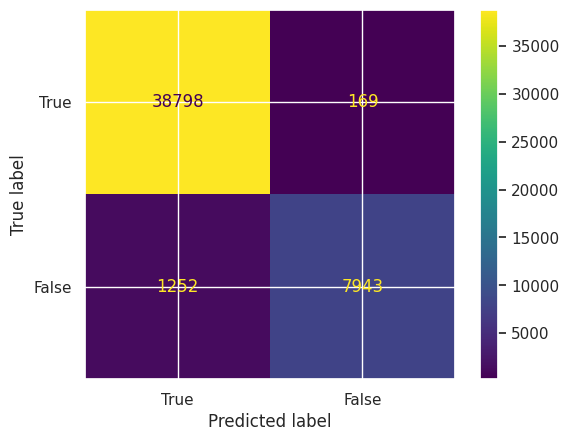

In [ ]:
cm_test = confusion_matrix(y_test_lof, pred_lof_model_test)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [ ]:
count0 = (df_test_lof['Anomaly'] == 1).sum()
count1 = (df_test_lof['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

8112 40050


In [ ]:
anomaly_lof_test = df_test_lof[df_test_lof['Anomaly'] == -1]
no_anomaly_lof_test = df_test_lof[df_test_lof['Anomaly'] == 1]

#### Graficas

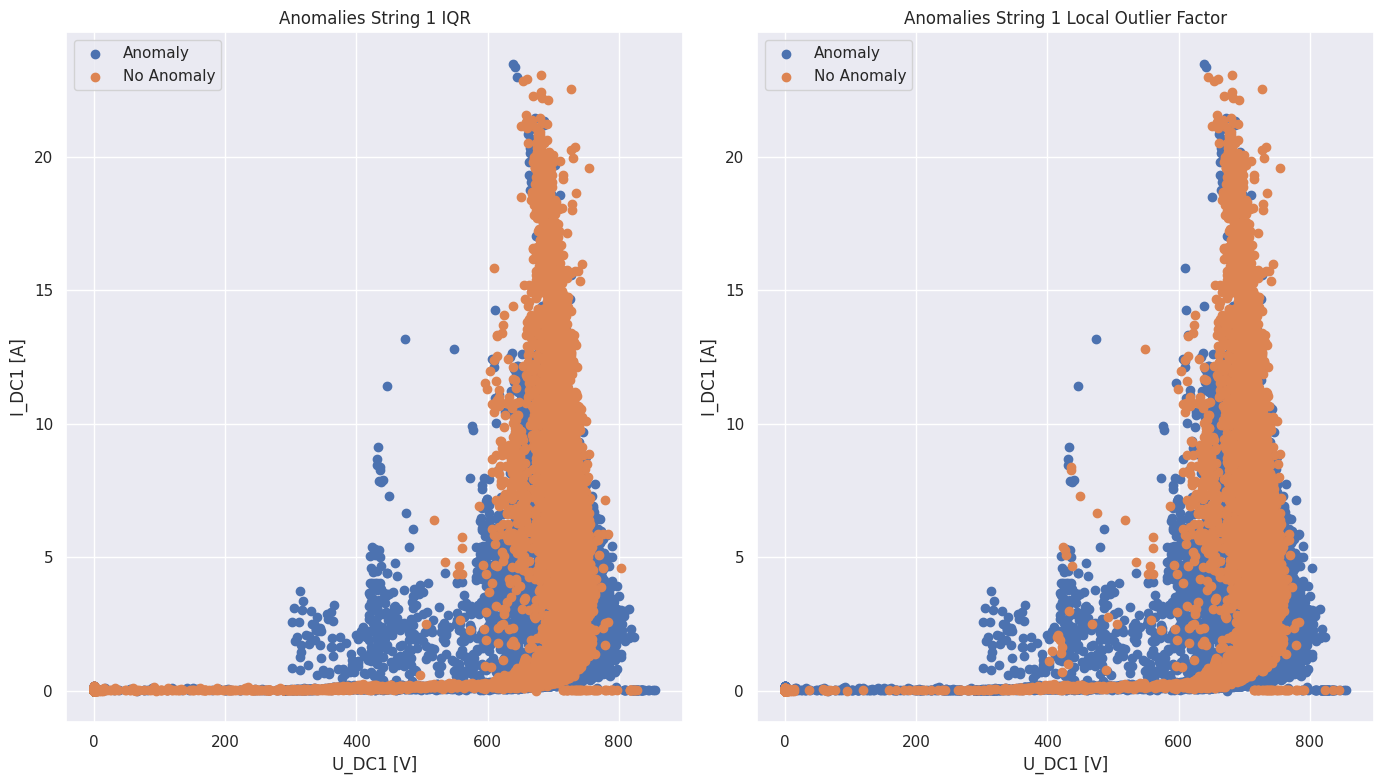

In [ ]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_lof_test['U_DC1'], anomaly_lof_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_lof_test['U_DC1'], no_anomaly_lof_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 Local Outlier Factor')


# Ajustes de diseño
plt.tight_layout()
plt.show()

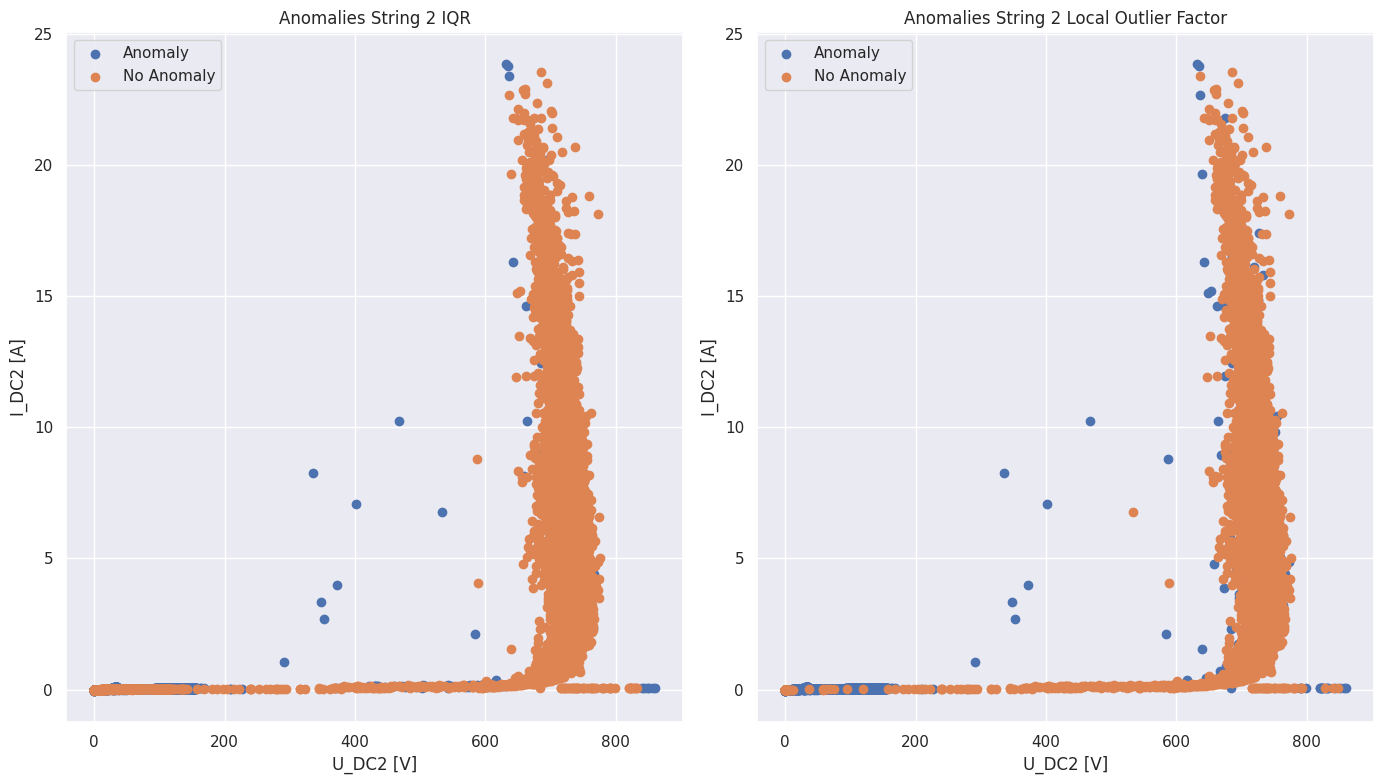

In [ ]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_lof_test['U_DC2'], anomaly_lof_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_lof_test['U_DC2'], no_anomaly_lof_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 Local Outlier Factor')


# Ajustes de diseño
plt.tight_layout()
plt.show()

### *Método Robust Covariance*

In [ ]:
df_rc = filtered_data

time = df_rc[['Timestamp']]
rows_rc = df_rc[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_rc = df_rc[(df_rc['Timestamp'] < '2021-09-03')]
df_test_rc = df_rc[(df_rc['Timestamp'] >= '2021-09-03')]

scaled_df_rc = scaler.fit_transform(rows_rc)

x_train_rc = scaled_df_rc[0:102236]
x_test_rc = scaled_df_rc[102236:150398]

In [ ]:
y_train_rc = np.array(merged_df_train['Anomaly'])

In [ ]:
np.unique(y_train_rc)

array([0, 1])

In [ ]:
y_train_rc = y_train_rc.astype(bool)

In [ ]:
np.unique(y_train_rc)

array([False,  True])

In [ ]:
y_test_rc = np.array(merged_df_test['Anomaly'])
y_test_rc = y_test_rc.astype(bool)
#y_test_rc[y_test_rc == 1] = -1
#y_test_rc[y_test_rc == 0] = 1

In [ ]:
np.unique(y_test_rc)

array([False,  True])

Datos de entrenamiento

In [ ]:
'''
param_grid = {
    "support_fraction": [0.5, 0.6, 0.7, 0.8, 0.9, None]
}

def accuracy_scorer(estimator, X, y):
    mahal_dist = estimator.mahalanobis(X)
    df_features = X.shape[1]
    threshold = chi2.ppf(0.975, df=df_features)  # Chi Squared Distribution
    y_pred = mahal_dist > threshold  # Detect Anomalies

    return accuracy_score(y, y_pred)  # Maximize accuracy

grid_search = GridSearchCV(MinCovDet(), param_grid, scoring=accuracy_scorer, cv=5)
grid_search.fit(x_train_rc, y_train_rc)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Hiperparameters: {best_params}")
'''

Best Hiperparameters: {'support_fraction': 0.6}


In [ ]:
best_model_rc = MinCovDet(support_fraction=0.6)
best_model_rc.fit(x_train_rc)
mahal_dist_train = best_model_rc.mahalanobis(x_train_rc)

# Define anomaly threshold using chi-squared distribution
df_features = x_train_rc.shape[1]  # Number of features
threshold = chi2.ppf(0.975, df=df_features)  # 97.5% confidence interval

In [ ]:
pred_rc_model_train = np.array(mahal_dist_train > threshold)
df_train_rc['Anomaly'] = pred_rc_model_train

<ipython-input-341-1da08030e96e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_rc['Anomaly'] = pred_rc_model_train


In [ ]:
np.unique(pred_rc_model_train)

array([False,  True])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_train_rc, pred_rc_model_train)
precision = precision_score(y_train_rc, pred_rc_model_train)
f1_score = f1_score(y_train_rc, pred_rc_model_train)
recall = recall_score(y_train_rc, pred_rc_model_train)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.14728324261275272
Accuracy: 0.6287022183966509
F1_Score: 0.24204304939898566
Recall: 0.6787234042553192


In [ ]:
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = sum((y_act == True) & (y_pred == True))
    tn = sum((y_act == False) & (y_pred == False))
    fn = sum((y_act == True) & (y_pred == False))
    fp = sum((y_act == False) & (y_pred == True))
    return tp, tn, fp, fn


tp,tn,fn,fp = compute_tp_tn_fn_fp(y_train_rc, pred_rc_model_train)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 6061
Number of TN: 58215
Number of FP: 2869
Number of FN: 35091


In [ ]:
count0 = (df_train_rc['Anomaly'] == False).sum()
count1 = (df_train_rc['Anomaly'] == True).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

61084 41152


In [ ]:
anomaly_rc_train = df_train_rc[df_train_rc['Anomaly'] == True]
no_anomaly_rc_train = df_train_rc[df_train_rc['Anomaly'] == False]

In [ ]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_train['Timestamp'].isin(anomaly_rc_train['Timestamp']).sum())

6061


<ipython-input-358-2ca777588f51>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_train['Timestamp'].isin(anomaly_rc_train['Timestamp']).sum())


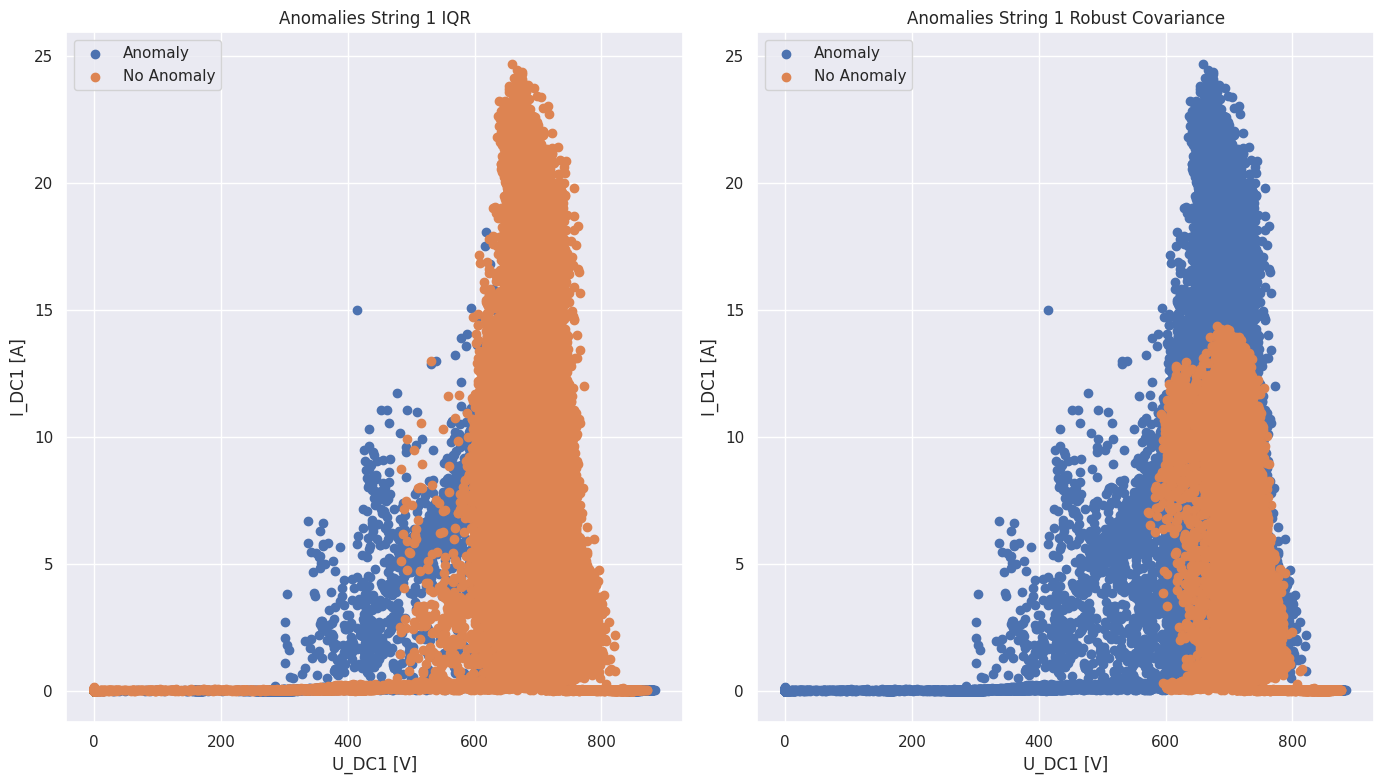

In [ ]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC1'], anomaly_iqr_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC1'], no_anomaly_iqr_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_rc_train['U_DC1'], anomaly_rc_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_rc_train['U_DC1'], no_anomaly_rc_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 Robust Covariance')


# Ajustes de diseño
plt.tight_layout()
plt.show()

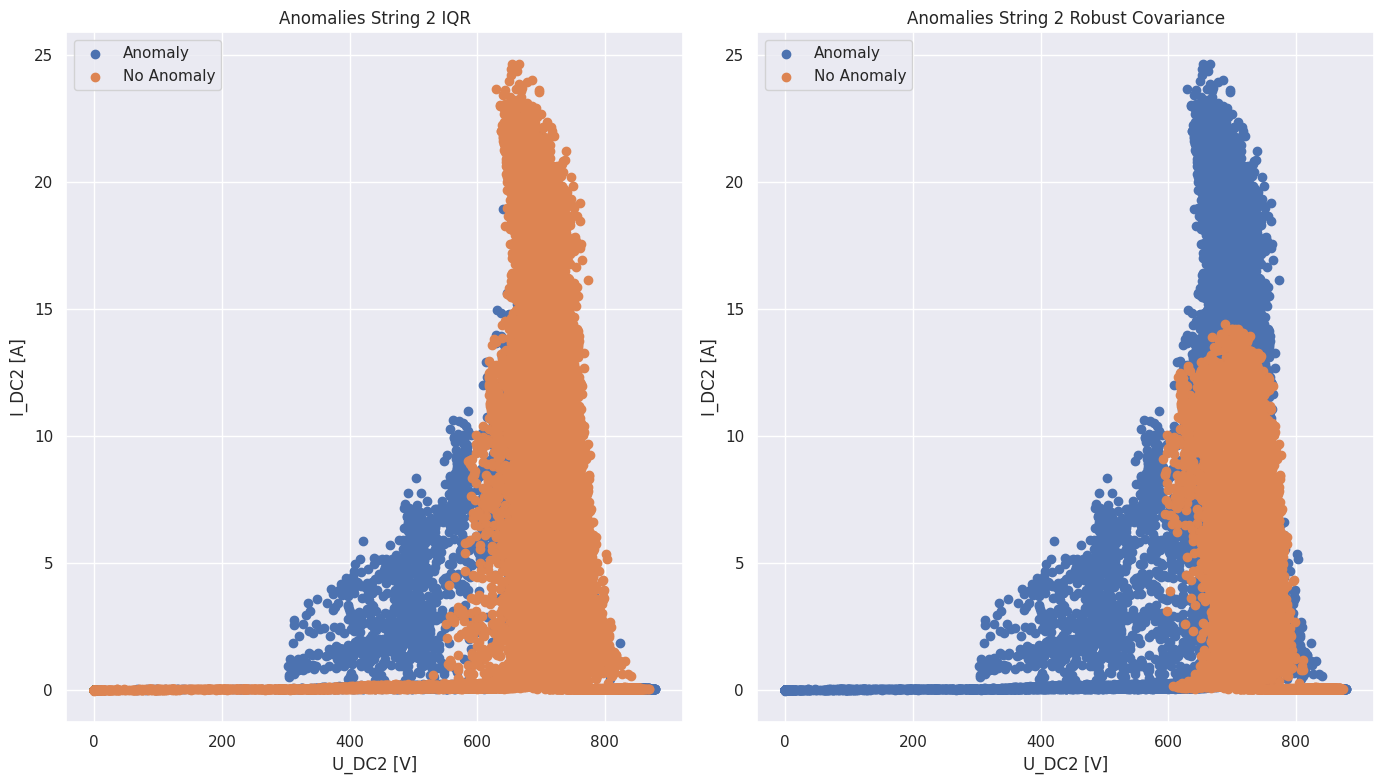

In [ ]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC2'], anomaly_iqr_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC2'], no_anomaly_iqr_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_rc_train['U_DC2'], anomaly_rc_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_rc_train['U_DC2'], no_anomaly_rc_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 Robust Covariance')


# Ajustes de diseño
plt.tight_layout()
plt.show()

Datos de Prueba

In [ ]:
mahal_dist_test = best_model_rc.mahalanobis(x_test_rc)

df_features = x_test_rc.shape[1]  # Number of features
threshold = chi2.ppf(0.975, df=df_features)  # 97.5% confidence interval

# Predict anomalies on test data
pred_rc_model_test = mahal_dist_test > threshold
df_test_rc['Anomaly'] = pred_rc_model_test

<ipython-input-366-2afe1c85d281>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_rc['Anomaly'] = pred_rc_model_test


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_test_rc, pred_rc_model_test)
precision = precision_score(y_test_rc, pred_rc_model_test)
f1_score = f1_score(y_test_rc, pred_rc_model_test)
recall = recall_score(y_test_rc, pred_rc_model_test)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9330171050740261
Accuracy: 0.9415099040737511
F1_Score: 0.9650968293498866
Recall: 0.9994610824543845


In [ ]:
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = sum((y_act == True) & (y_pred == True))
    tn = sum((y_act == False) & (y_pred == False))
    fn = sum((y_act == True) & (y_pred == False))
    fp = sum((y_act == False) & (y_pred == True))
    return tp, tn, fp, fn

tp,tn,fn,fp = compute_tp_tn_fn_fp(y_test_rc, pred_rc_model_test)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 38946
Number of TN: 6399
Number of FP: 21
Number of FN: 2796


In [ ]:
count0 = (df_test_rc['Anomaly'] == False).sum()
count1 = (df_test_rc['Anomaly'] == True).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

6420 41742


In [ ]:
anomaly_rc_test = df_test_rc[df_test_rc['Anomaly'] == True]
no_anomaly_rc_test = df_test_rc[df_test_rc['Anomaly'] == False]

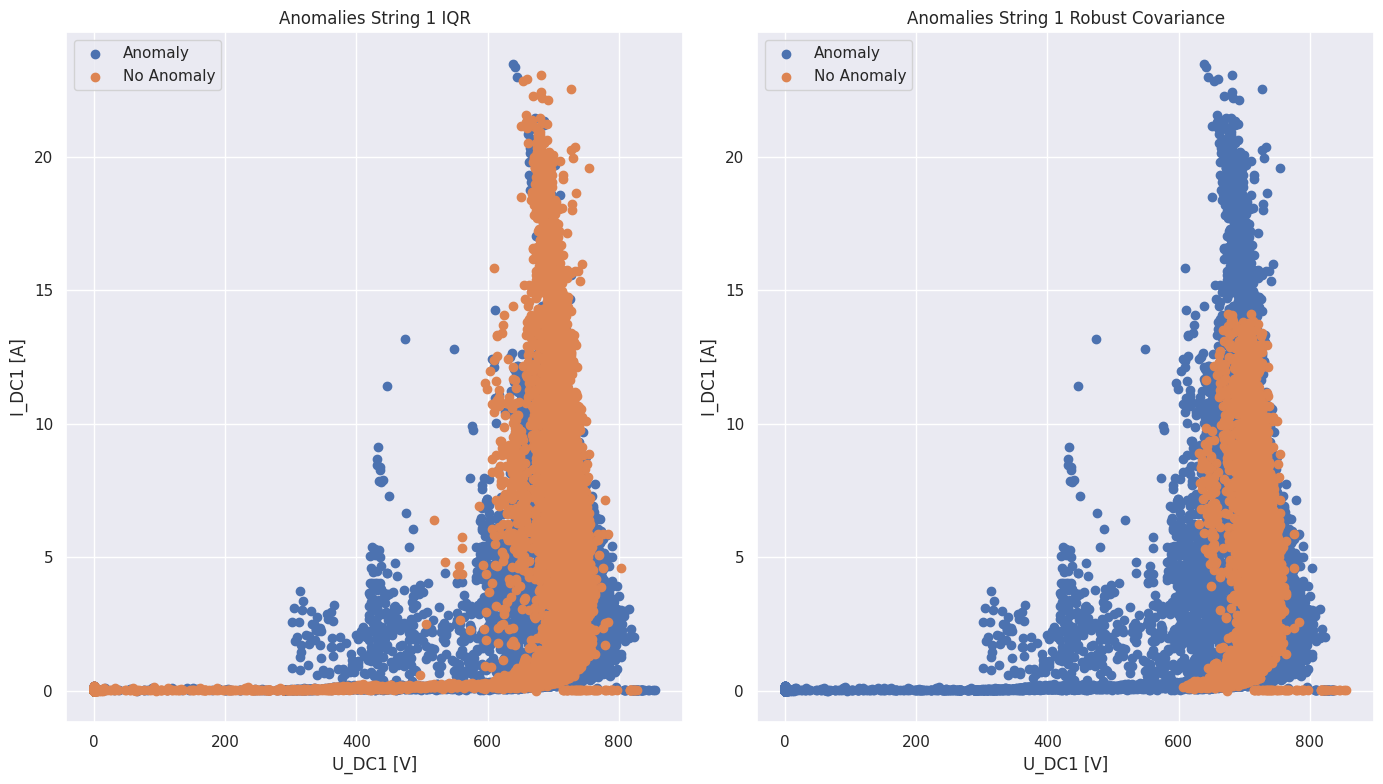

In [ ]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_rc_test['U_DC1'], anomaly_rc_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_rc_test['U_DC1'], no_anomaly_rc_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('Anomalies String 1 Robust Covariance')


# Ajustes de diseño
plt.tight_layout()
plt.show()

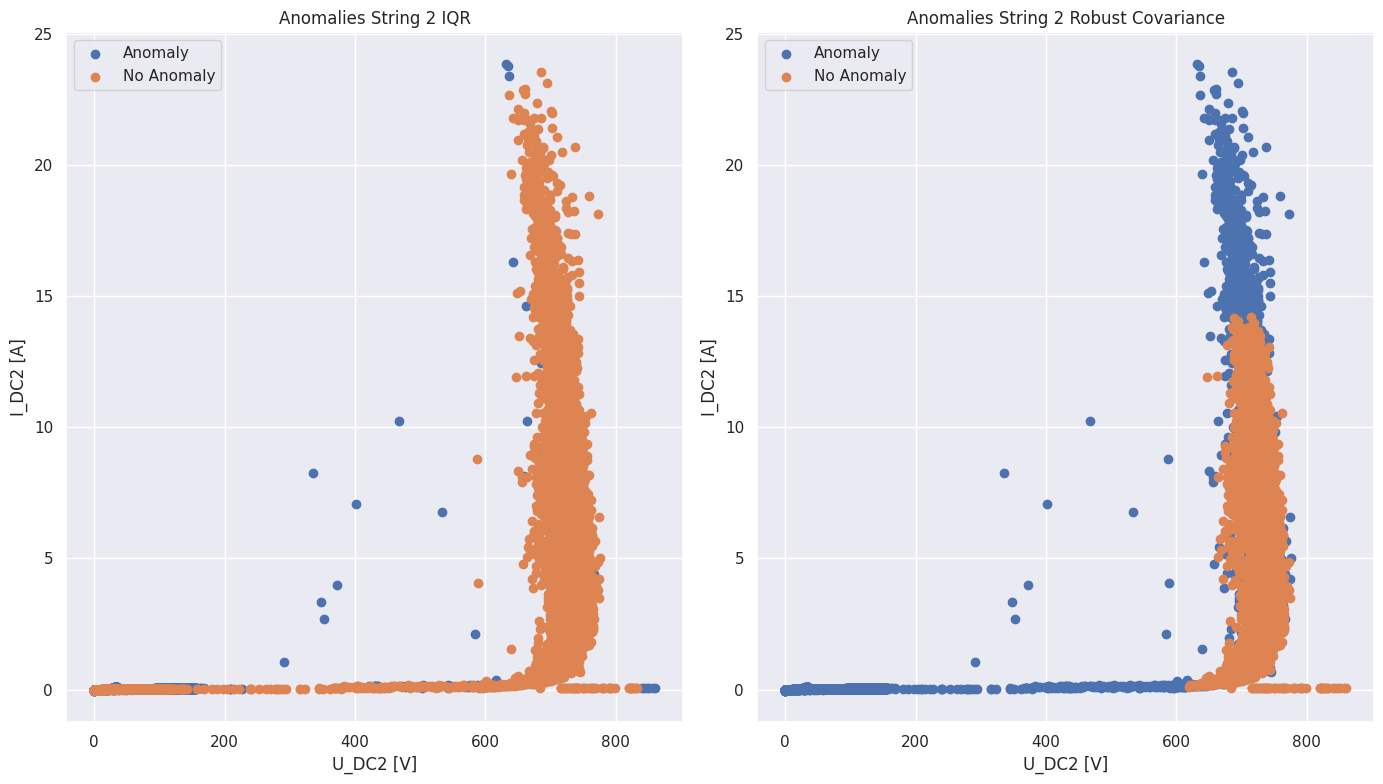

In [ ]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_rc_test['U_DC2'], anomaly_rc_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_rc_test['U_DC2'], no_anomaly_rc_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('Anomalies String 2 Robust Covariance')


# Ajustes de diseño
plt.tight_layout()
plt.show()

### *Método Autoencoder*

In [44]:
df_ae = filtered_data

time = df_ae[['Timestamp']]
rows_ae = df_ae[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_ae = df_ae[(df_ae['Timestamp'] < '2021-09-03')]
df_test_ae = df_ae[(df_ae['Timestamp'] >= '2021-09-03')]

rows_ae_train = df_train_ae[['U_DC1','U_DC2','I_DC1','I_DC2']]
rows_ae_test = df_test_ae[['U_DC1','U_DC2','I_DC1','I_DC2']]

x_train_ae = scaler.fit_transform(rows_ae_train)
x_test_ae = scaler.transform(rows_ae_test)

y_train_ae = np.array(merged_df_train['Anomaly'])
y_test_ae = np.array(merged_df_test['Anomaly'])


In [45]:
y_train_ae

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
#Reshape LSTM Data

x_train_ae_lstm = x_train_ae.reshape(x_train_ae.shape[0],1,x_train_ae.shape[1])
print("Training data shape:", x_train_ae_lstm.shape)
x_test_ae_lstm = x_test_ae.reshape(x_test_ae.shape[0],1,x_test_ae.shape[1])
print("Testing data shape:", x_test_ae_lstm.shape)

Training data shape: (102236, 1, 4)
Testing data shape: (48162, 1, 4)


#### Datos de entrenamiento

In [47]:
'''
#Model 1 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps, 4 features)
    L1 = LSTM(64, activation='tanh', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.001))(inputs)
    L1 = Dropout(0.05)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(64, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.001))(L2)
    L3 = Dropout(0.05)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
    return model
'''
"""

#Model 1 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps, 4 features)
    L1 = LSTM(32, activation='tanh', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.001))(inputs)
    L1 = Dropout(0.05)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(32, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.001))(L2)
    L3 = Dropout(0.05)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
    return model
"""
'''
#Model 1 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps, 4 features)
    L1 = LSTM(16, activation='tanh', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.001))(inputs)
    L1 = Dropout(0.05)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(16, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.001))(L2)
    L3 = Dropout(0.05)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
    return model
'''
'''
#Model 1 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps, 4 features)
    L1 = LSTM(8, activation='tanh', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.001))(inputs)
    L1 = Dropout(0.05)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(8, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.001))(L2)
    L3 = Dropout(0.05)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
    return model
'''
"""
#Model 1 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps, 4 features)
    L1 = LSTM(4, activation='tanh', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.001))(inputs)
    L1 = Dropout(0.05)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(4, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.001))(L2)
    L3 = Dropout(0.05)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
    return model
"""

"""
#Model 2 - 5 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(inputs)
    L1 = Dropout(0.1)(L1)
    L2 = LSTM(4, activation='relu', return_sequences=False,kernel_regularizer=regularizers.l2(0.01))(L1)
    L2 = Dropout(0.1)(L2)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True,kernel_regularizer=regularizers.l2(0.01))(L3)
    L4 = Dropout(0.1)(L4)
    L5 = LSTM(16, activation='relu', return_sequences=True,kernel_regularizer=regularizers.l2(0.01))(L4)
    L5 = Dropout(0.1)(L5)

    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model
"""

"""

#Model 3 - 7 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(64, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(inputs)
    L1 = Dropout(0.1)(L1)
    L2 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L1)
    L2 = Dropout(0.1)(L2)
    L3 = LSTM(4, activation='relu', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.01))(L2)
    L3 = Dropout(0.1)(L3)
    L4 = RepeatVector(X.shape[1])(L3)
    L5 = LSTM(4, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L4)
    L5 = Dropout(0.1)(L5)
    L6 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L5)
    L6 = Dropout(0.1)(L6)
    L7 = LSTM(64, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L6)
    L7 = Dropout(0.2)(L7)

    output = TimeDistributed(Dense(X.shape[2]))(L7)
    model = Model(inputs=inputs, outputs=output)
    return model
"""
"""
#Model 4 - 9 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(256, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(inputs)
    L1 = Dropout(0.1)(L1)
    L2 = LSTM(64, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L1)
    L2 = Dropout(0.1)(L2)
    L3 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L2)
    L3 = Dropout(0.1)(L3)
    L4 = LSTM(4, activation='relu', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.01))(L3)
    L4 = Dropout(0.1)(L4)
    L5 = RepeatVector(X.shape[1])(L4)
    L6 = LSTM(4, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L5)
    L6 = Dropout(0.1)(L6)
    L7 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L6)
    L7 = Dropout(0.1)(L7)
    L8 = LSTM(64, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L7)
    L8 = Dropout(0.1)(L8)
    L9 = LSTM(256, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L8)
    L9 = Dropout(0.1)(L9)
    output = TimeDistributed(Dense(X.shape[2]))(L9)
    model = Model(inputs=inputs, outputs=output)
    return model
"""
"""
# Model 5 - 11 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(1024, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L1 = Dropout(0.2)(L1)
    L2 = LSTM(256, activation='relu', return_sequences=True)(L1)
    L2 = Dropout(0.2)(L2)
    L3 = LSTM(64, activation='relu', return_sequences=True)(L2)
    L3 = Dropout(0.2)(L3)
    L4 = LSTM(16, activation='relu', return_sequences=True)(L3)
    L4 = Dropout(0.2)(L4)
    L5 = LSTM(4, activation='relu', return_sequences=False)(L4)
    L5 = Dropout(0.2)(L5)
    L6 = RepeatVector(X.shape[1])(L5)
    L7 = LSTM(4, activation='relu', return_sequences=True)(L6)
    L7 = Dropout(0.2)(L7)
    L8 = LSTM(16, activation='relu', return_sequences=True)(L7)
    L8 = Dropout(0.2)(L8)
    L9 = LSTM(64, activation='relu', return_sequences=True)(L8)
    L9 = Dropout(0.2)(L9)
    L10 = LSTM(256, activation='relu', return_sequences=True)(L9)
    L10 = Dropout(0.2)(L10)
    L11 = LSTM(1024, activation='relu', return_sequences=True)(L10)
    L11 = Dropout(0.2)(L11)

    output = TimeDistributed(Dense(X.shape[2]))(L11)
    model = Model(inputs=inputs, outputs=output)
    return model
"""

"\n# Model 5 - 11 layers without counting input and output\ndef autoencoder_model(X):\n    inputs = Input(shape=(X.shape[1], X.shape[2]))\n    L1 = LSTM(1024, activation='relu', return_sequences=True,\n              kernel_regularizer=regularizers.l2(0.00))(inputs)\n    L1 = Dropout(0.2)(L1)\n    L2 = LSTM(256, activation='relu', return_sequences=True)(L1)\n    L2 = Dropout(0.2)(L2)\n    L3 = LSTM(64, activation='relu', return_sequences=True)(L2)\n    L3 = Dropout(0.2)(L3)\n    L4 = LSTM(16, activation='relu', return_sequences=True)(L3)\n    L4 = Dropout(0.2)(L4)\n    L5 = LSTM(4, activation='relu', return_sequences=False)(L4)\n    L5 = Dropout(0.2)(L5)\n    L6 = RepeatVector(X.shape[1])(L5)\n    L7 = LSTM(4, activation='relu', return_sequences=True)(L6)\n    L7 = Dropout(0.2)(L7)\n    L8 = LSTM(16, activation='relu', return_sequences=True)(L7)\n    L8 = Dropout(0.2)(L8)\n    L9 = LSTM(64, activation='relu', return_sequences=True)(L8)\n    L9 = Dropout(0.2)(L9)\n    L10 = LSTM(256, act

In [48]:
'''
#Model 2 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps, 4 features)
    L1 = LSTM(16, activation='tanh', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.002))(inputs)
    L1 = Dropout(0.05)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(16, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.002))(L2)
    L3 = Dropout(0.05)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
    return model
'''
'''
#Model 2 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps, 4 features)
    L1 = LSTM(16, activation='tanh', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.005))(inputs)
    L1 = Dropout(0.05)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(16, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.005))(L2)
    L3 = Dropout(0.05)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
    return model
'''
'''
#Model 2 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps, 4 features)
    L1 = LSTM(16, activation='tanh', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.008))(inputs)
    L1 = Dropout(0.05)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(16, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.008))(L2)
    L3 = Dropout(0.05)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
    return model
'''
'''
#Model 2 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps, 4 features)
    L1 = LSTM(16, activation='tanh', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.01))(inputs)
    L1 = Dropout(0.05)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(16, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L2)
    L3 = Dropout(0.05)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
    return model
'''
#Model 2 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps, 4 features)
    L1 = LSTM(16, activation='tanh', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.1))(inputs)
    L1 = Dropout(0.05)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(16, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.1))(L2)
    L3 = Dropout(0.05)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
    return model

In [49]:
ae_model = autoencoder_model(x_train_ae_lstm)
ae_model.compile(optimizer='adam',loss='mae')
ae_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 4)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 16)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 1, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 16)               │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 1, 4)                │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,524 (13.77 KB)

 Trainable params: 3,524 (13.77 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
nb_epochs = 50
batch_size = 32
history = ae_model.fit(x_train_ae_lstm, x_train_ae_lstm, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.1).history

Epoch 1/50
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.9827 - val_loss: 0.6712
Epoch 2/50
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - loss: 0.5842 - val_loss: 0.6764
Epoch 3/50
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.5851 - val_loss: 0.6767
Epoch 4/50
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.5830 - val_loss: 0.6803
Epoch 5/50
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.5793 - val_loss: 0.6685
Epoch 6/50
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.5829 - val_loss: 0.6623
Epoch 7/50
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.5837 - val_loss: 0.6813
Epoch 8/50
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.5836 - val_loss: 0.6815
Epoch 9/50
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.5790 - val_loss: 0.6782
Epoch 10/50
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.5848 - val_loss: 0.6816
Epoch 11/50
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.5841 - val_loss: 0.6696
Epoch 12/50
2876/28

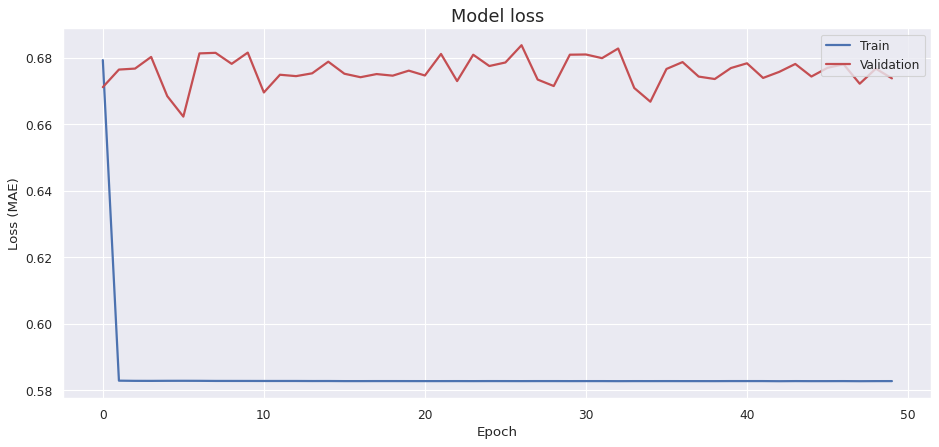

In [51]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (MAE)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [52]:
x_pred_ae = ae_model.predict(x_train_ae_lstm)
x_pred_ae = x_pred_ae.reshape(x_pred_ae.shape[0], x_pred_ae.shape[2])
x_pred_ae = pd.DataFrame(x_pred_ae, columns=rows_ae_train.columns)

3195/3195 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [53]:
scored = pd.DataFrame()
x_train_layers = x_train_ae_lstm.reshape(x_train_ae_lstm.shape[0], x_train_ae_lstm.shape[2])
scored['Loss_mae'] = np.mean(np.abs(x_pred_ae - x_train_layers),axis=1)

<ipython-input-56-3fc0d892c3cf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored['Loss_mae'], bins = 100, kde= True, color = 'blue');


(0.0, 1.0)

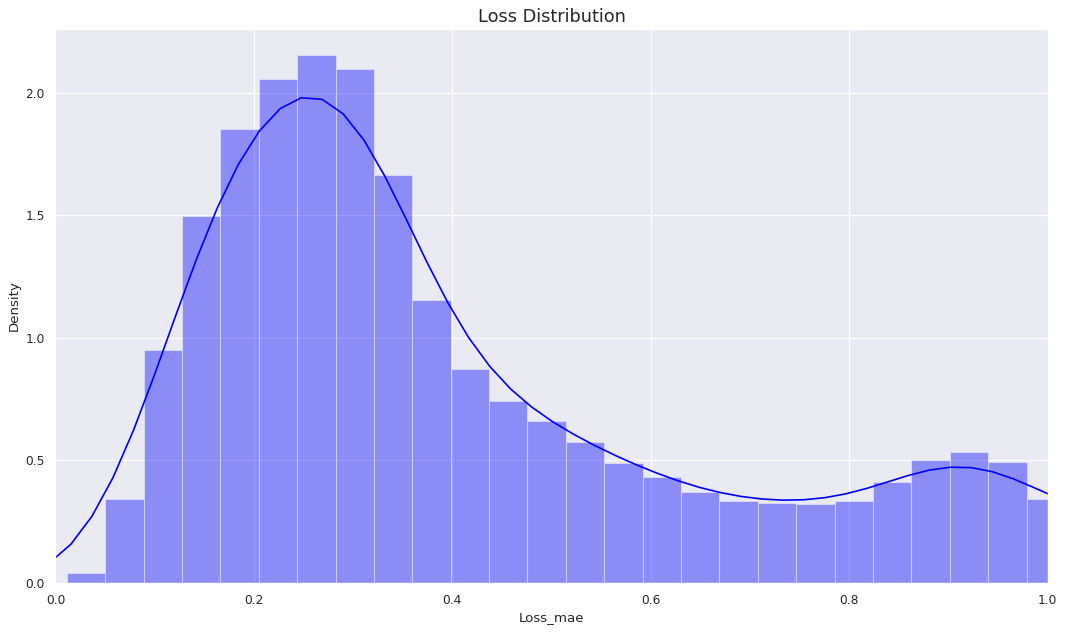

In [56]:
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 100, kde= True, color = 'blue');
plt.xlim([0.0,1])

In [71]:
scored['Threshold'] = 0.7
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
anomalies_ae_train = np.array(scored['Anomaly'])
anomalies_ae_train = anomalies_ae_train.astype(int)

In [72]:
np.unique(anomalies_ae_train)

array([0, 1])

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


accuracy = accuracy_score(anomalies_ae_train,y_train_ae)
precision = precision_score(anomalies_ae_train,y_train_ae)
f1_score = f1_score(anomalies_ae_train,y_train_ae)
recall = recall_score(anomalies_ae_train,y_train_ae)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

anomalies_ae_train[anomalies_ae_train==1].shape

Precision: 0.9604703247480403
Accuracy: 0.7849974568645096
F1_Score: 0.4383288616328095
Recall: 0.2839596093362026


(30205,)

Text(0.5, 1.0, 'Confusion Matrix for LSTM Autoencoder - Train Data')

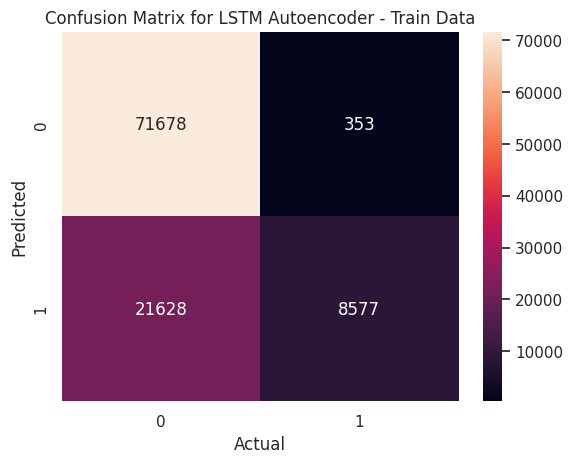

In [74]:
cm_train = confusion_matrix(anomalies_ae_train,y_train_ae)
sns.heatmap(cm_train,annot=True, fmt='g')
# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for LSTM Autoencoder - Train Data')

In [75]:
#Make Confusion Matrix and Evaluate TP, TN, FN, FP
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = sum((y_act == 1) & (y_pred == 1))
    tn = sum((y_act == 0) & (y_pred == 0))
    fn = sum((y_act == 1) & (y_pred == 0))
    fp = sum((y_act == 0) & (y_pred == 1))
    return tp, tn, fp, fn

tp,tn,fn,fp = compute_tp_tn_fn_fp(anomalies_ae_train,y_train_ae)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

def specificity(tn,fp):
    return tn/(tn+fp)


specificity_train = specificity(tn,fp)
print('Specificity:'+ str(specificity_train))

Number of TP: 8577
Number of TN: 71678
Number of FP: 21628
Number of FN: 353
Specificity:0.7682035453239877


In [76]:
df_train_ae['Anomaly'] = anomalies_ae_train

<ipython-input-76-0d7313a408ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_ae['Anomaly'] = anomalies_ae_train


In [77]:
count0 = (df_train_ae['Anomaly'] == 0).sum()
count1 = (df_train_ae['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

72031 30205


In [78]:
anomaly_ae_train = df_train_ae[df_train_ae['Anomaly'] == 1]
no_anomaly_ae_train = df_train_ae[df_train_ae['Anomaly'] == 0]

In [80]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_train['Timestamp'].isin(anomaly_ae_train['Timestamp']).sum())

8577


<ipython-input-80-1e1cb3eb54d6>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_train['Timestamp'].isin(anomaly_ae_train['Timestamp']).sum())


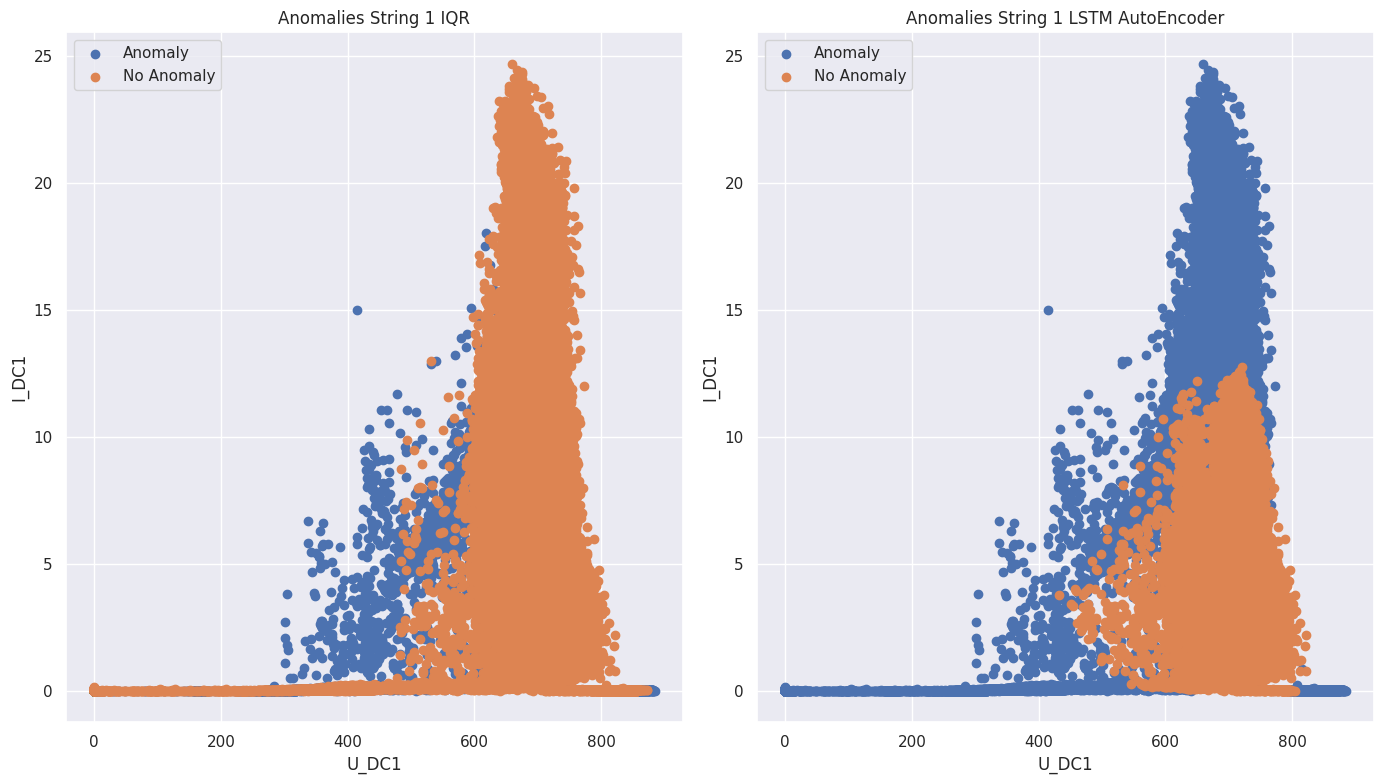

In [81]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC1'], anomaly_iqr_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC1'], no_anomaly_iqr_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_train['U_DC1'], anomaly_ae_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_ae_train['U_DC1'], no_anomaly_ae_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

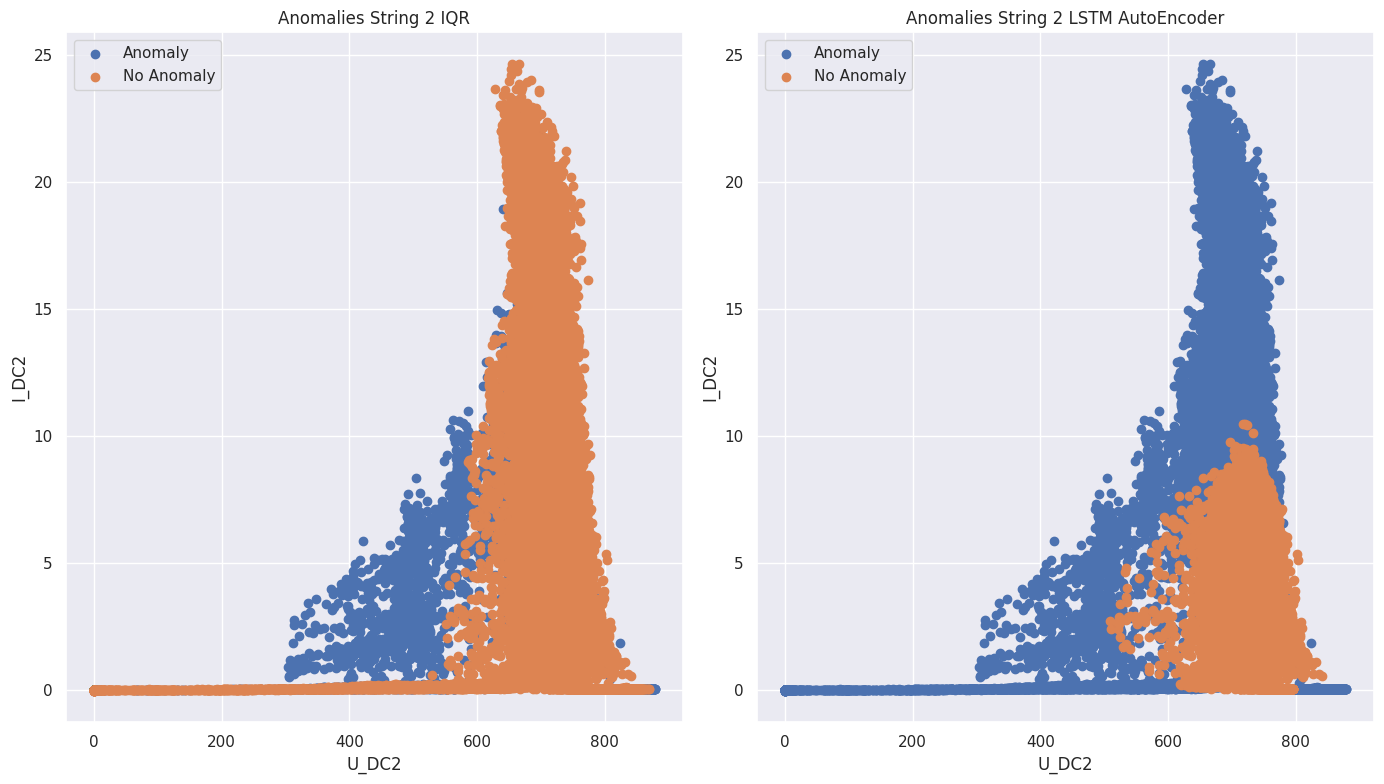

In [82]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC2'], anomaly_iqr_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC2'], no_anomaly_iqr_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_train['U_DC2'], anomaly_ae_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_ae_train['U_DC2'], no_anomaly_ae_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

#### Datos de Prueba

In [83]:
x_pred_ae_test = ae_model.predict(x_test_ae_lstm)
x_pred_ae_test = x_pred_ae_test.reshape(x_pred_ae_test.shape[0], x_pred_ae_test.shape[2])
x_pred_ae_test = pd.DataFrame(x_pred_ae_test, columns=rows_ae_test.columns)

1506/1506 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

scored_test = pd.DataFrame()
x_test_layers = x_test_ae_lstm.reshape(x_test_ae_lstm.shape[0], x_test_ae_lstm.shape[2])
scored_test['Loss_mae'] = np.mean(np.abs(x_pred_ae_test-x_test_layers), axis = 1)
scored_test['Threshold'] = 0.07
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']
anomalies_ae_test = np.array(scored_test['Anomaly'])
anomalies_ae_test = anomalies_ae_test.astype(int)
accuracy = accuracy_score(anomalies_ae_test,y_test_ae)
precision = precision_score(anomalies_ae_test,y_test_ae)
f1_score = f1_score(anomalies_ae_test,y_test_ae)
recall = recall_score(anomalies_ae_test,y_test_ae)
print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))
anomalies_ae_test[anomalies_ae_test==1].shape

Precision: 1.0
Accuracy: 0.8108674888916573
F1_Score: 0.895350573854302
Recall: 0.8105291621599134


(48076,)

Text(0.5, 1.0, 'Confusion Matrix for LSTM Autoencoder - Test Data')

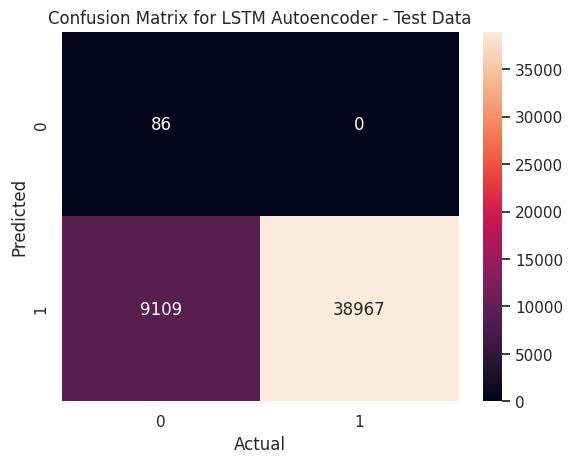

In [85]:
cm_test = confusion_matrix(anomalies_ae_test,y_test_ae)
sns.heatmap(cm_test,annot=True, fmt='g')
# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for LSTM Autoencoder - Test Data')

In [86]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(anomalies_ae_test,y_test_ae)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))


specificity_test = specificity(tn,fp)
print('Specificity:'+ str(specificity_test))


Number of TP: 38967
Number of TN: 86
Number of FP: 9109
Number of FN: 0
Specificity:0.009352909189777053


In [87]:
df_test_ae['Anomaly'] = anomalies_ae_test

<ipython-input-87-9956cf24a2bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_ae['Anomaly'] = anomalies_ae_test


In [88]:
count0 = (df_test_ae['Anomaly'] == 0).sum()
count1 = (df_test_ae['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

86 48076


In [89]:
anomaly_ae_test = df_test_ae[df_test_ae['Anomaly'] == 1]
no_anomaly_ae_test = df_test_ae[df_test_ae['Anomaly'] == 0]

In [90]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_test['Timestamp'].isin(anomaly_ae_test['Timestamp']).sum())

38967


<ipython-input-90-95248f615a7c>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_test['Timestamp'].isin(anomaly_ae_test['Timestamp']).sum())


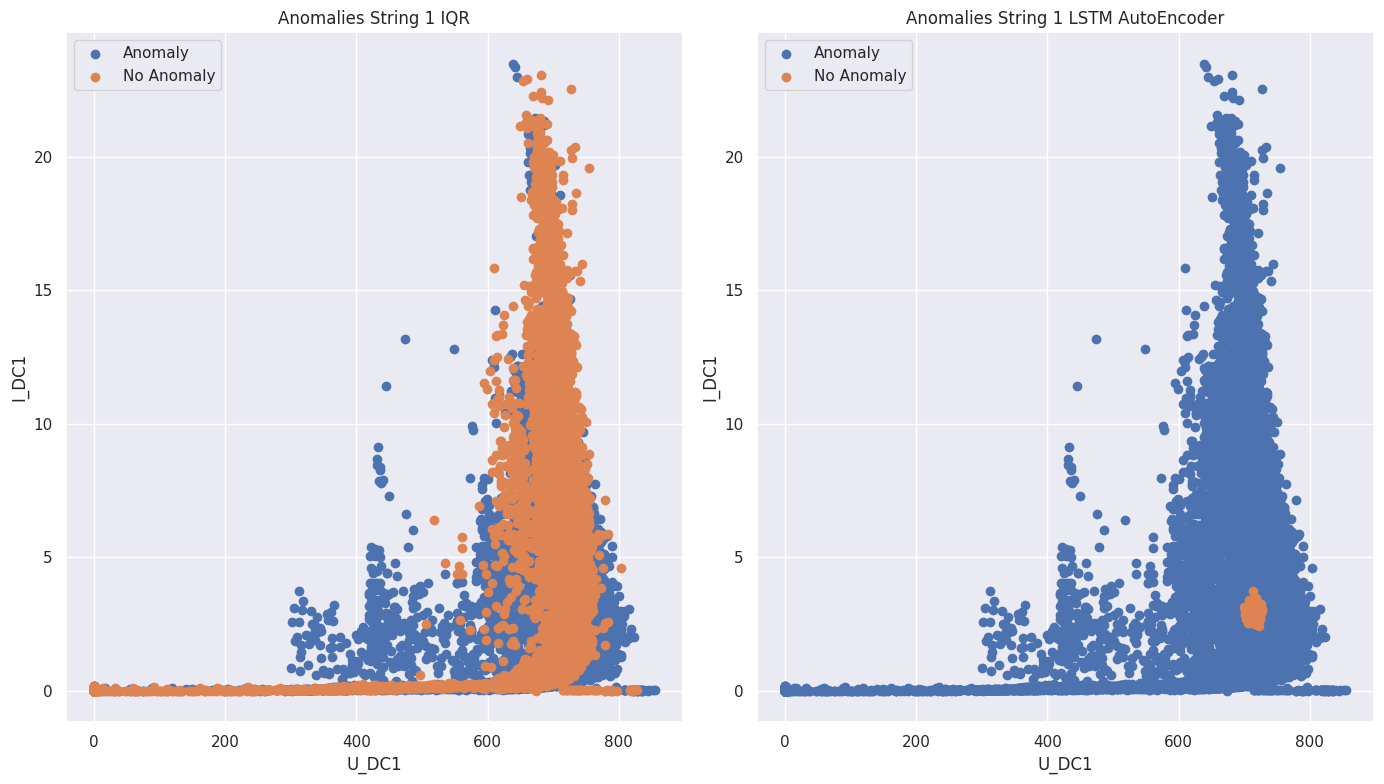

In [91]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_test['U_DC1'], anomaly_ae_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_ae_test['U_DC1'], no_anomaly_ae_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

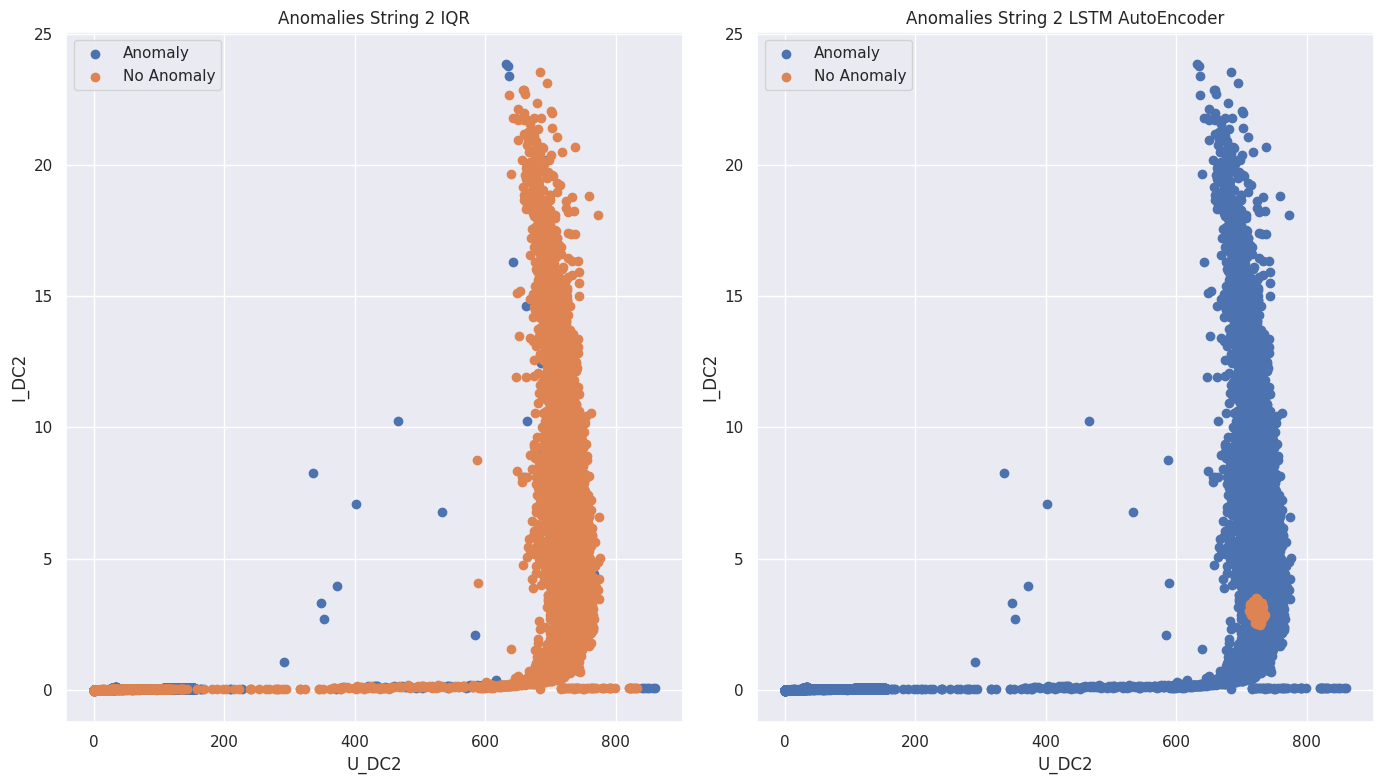

In [92]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_test['U_DC2'], anomaly_ae_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_ae_test['U_DC2'], no_anomaly_ae_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

### **EXPORTAR DATOS DE MÉTODO: LSTM AUTOENCODER**

In [93]:
ml_anomaly_df = pd.concat([df_train_ae,df_test_ae])

In [94]:
ml_anomaly_df

Timestamp    U_DC1    U_DC2   I_DC1   I_DC2  Anomaly
131     2019-08-02 16:25:00  777.010  768.710   2.700   2.607        0
132     2019-08-02 16:30:00  761.130  745.964   3.862   3.748        0
133     2019-08-02 16:35:00  736.754  742.908   3.228   3.192        0
134     2019-08-02 16:40:00  731.928  732.224   2.568   2.484        0
135     2019-08-02 16:45:00  723.546  720.698   1.654   1.640        0
...                     ...      ...      ...     ...     ...      ...
203056  2023-06-02 10:10:00  712.860  698.410  15.514  15.758        1
203057  2023-06-02 10:15:00  703.810  696.148  16.136  16.278        1
203058  2023-06-02 10:20:00  702.586  466.782  16.520  10.250        1
203059  2023-06-02 10:25:00  703.080   32.316  15.754   0.080        1
203060  2023-06-02 10:30:00  110.630   26.790   0.030   0.060        1

[150398 rows x 6 columns]

In [95]:
ml_anomaly_df.to_csv('df_with_anomalies_reg5.csv', sep=';', index=False, encoding='utf-8')